라이브러리 import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm



폰트설정

In [2]:
font_location = fm.findfont('NanumGothic')
font_name = fm.FontProperties(fname=font_location).get_name()

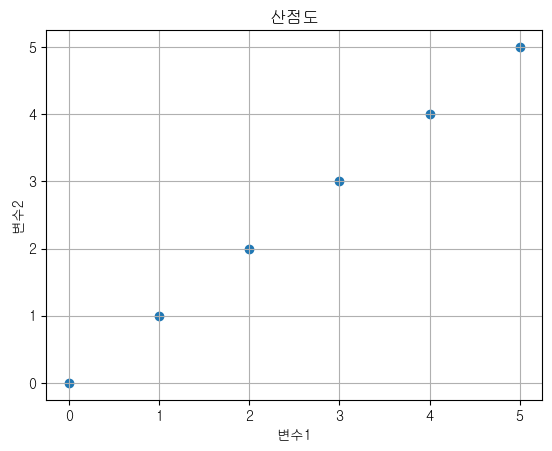

In [3]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

font_location = fm.findfont('NanumGothic')
font_name = fm.FontProperties(fname=font_location).get_name()

In [4]:
df = pd.read_csv("2022년도_교복 구매 유형 및 단가(중)_전체.csv")
df.head()

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,동복구매방식(학교주관구매),...,동복구매방식(기타사유),동복구매방식(해당없음),동복(평균)가격,하복구매방식(학교주관구매),하복구매방식(공동구매),하복구매방식(개별구매),하복구매방식(기타),하복구매방식(기타사유),하복구매방식(해당없음),하복(평균)가격
0,서울특별시교육청,교육부,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,3,국립,N,NaN,○,...,NaN,NaN,185000.0,NaN,NaN,NaN,NaN,NaN,○,NaN
1,서울특별시교육청,교육부,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,3,국립,N,NaN,○,...,NaN,NaN,215000.0,○,NaN,NaN,NaN,NaN,NaN,88000.0
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000698,개원중학교,3,공립,N,NaN,○,...,NaN,NaN,155000.0,○,NaN,NaN,NaN,NaN,NaN,65000.0
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S010000700,경원중학교,3,공립,N,NaN,○,...,NaN,NaN,224040.0,○,NaN,NaN,NaN,NaN,NaN,90530.0
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000701,구룡중학교,3,공립,N,NaN,○,...,NaN,NaN,214000.0,○,NaN,NaN,NaN,NaN,NaN,77000.0


지역별 교복 가격 분석?

지역별 교복 가격 데이터로 무엇을 분석할 수 있을까?

1. 사교육비별? 교복 가격 분석
서울같은 곳은 사교육비가 높을 것...
천안도 불당동같은 경우 소득이 높은 사람들이 몰려살음 => 교복비 높을수도

2. 국, 공, 사립별로 교복 가격 분석

분석 목표 : 사교육비가 높은 곳은 교복 가격도 높을 것이다.
또한 국립이냐 공립이냐 사립이냐에 따라 교복 가격에 분명 차이가 있을 것.

3. 지역별 하복, 동복의 가격 차이


#### 목차

### 1. 데이터 확인
- (1). 결측치 확인

### 2. 전처리
- (1). 결측치 처리

### 1. 데이터 확인


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시도교육청           3272 non-null   object 
 1   지역교육청           3272 non-null   object 
 2   지역              3271 non-null   object 
 3   정보공시 학교코드       3272 non-null   object 
 4   학교명             3272 non-null   object 
 5   학교급코드           3272 non-null   int64  
 6   설립구분            3272 non-null   object 
 7   제외여부            3272 non-null   object 
 8   제외사유            159 non-null    object 
 9   동복구매방식(학교주관구매)  2889 non-null   object 
 10  동복구매방식(공동구매)    91 non-null     object 
 11  동복구매방식(개별구매)    96 non-null     object 
 12  동복구매방식(기타)      29 non-null     object 
 13  동복구매방식(기타사유)    29 non-null     object 
 14  동복구매방식(해당없음)    8 non-null      object 
 15  동복(평균)가격        2979 non-null   float64
 16  하복구매방식(학교주관구매)  2874 non-null   object 
 17  하복구매방식(공동구매)    93 non-null     o

(1). 결측치 확인

In [6]:
# 결측치 개수 확인
missing_count = df.isnull().sum()
print(missing_count)

시도교육청                0
지역교육청                0
지역                   1
정보공시 학교코드            0
학교명                  0
학교급코드                0
설립구분                 0
제외여부                 0
제외사유              3113
동복구매방식(학교주관구매)     383
동복구매방식(공동구매)      3181
동복구매방식(개별구매)      3176
동복구매방식(기타)        3243
동복구매방식(기타사유)      3243
동복구매방식(해당없음)      3264
동복(평균)가격           293
하복구매방식(학교주관구매)     398
하복구매방식(공동구매)      3179
하복구매방식(개별구매)      3179
하복구매방식(기타)        3243
하복구매방식(기타사유)      3243
하복구매방식(해당없음)      3248
하복(평균)가격           306
dtype: int64


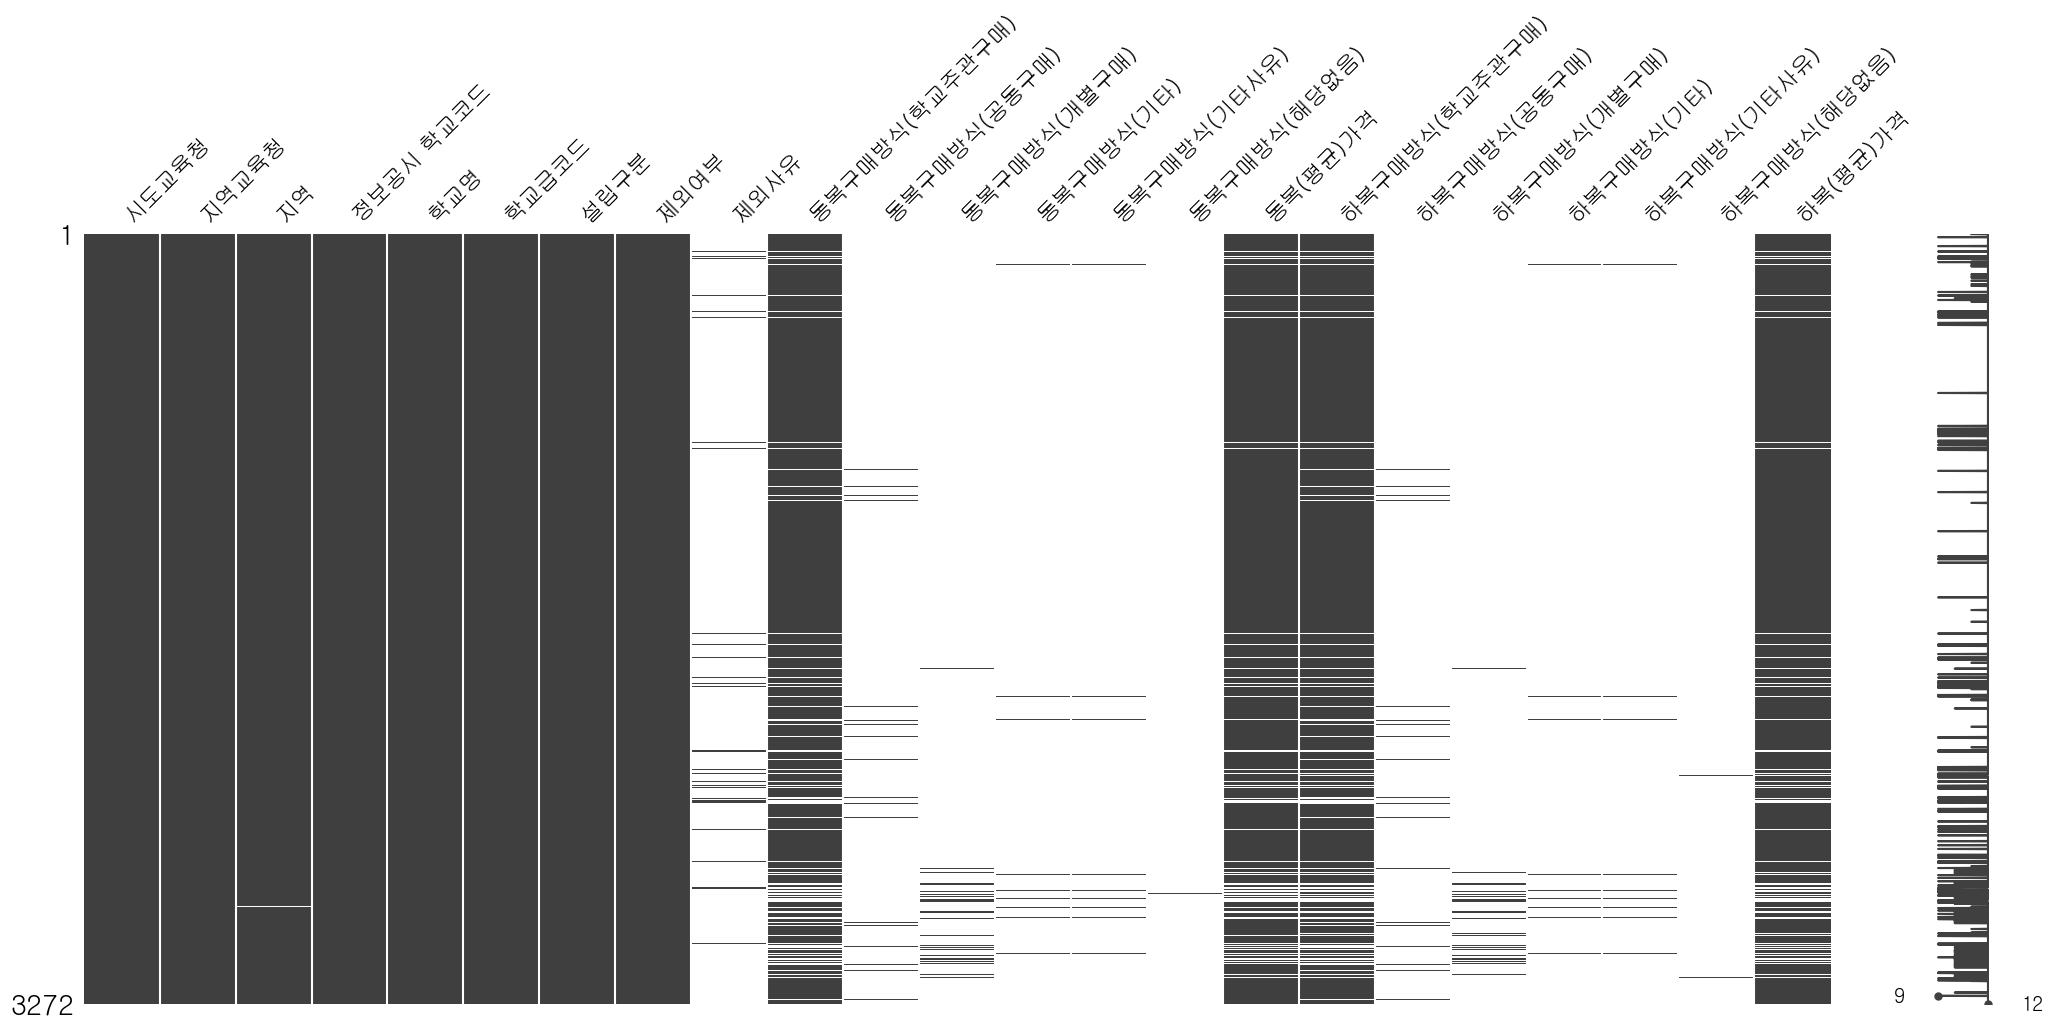

In [7]:
import missingno as msno
msno.matrix(df)


plt.rc('font', family=font_name)
plt.show()

### 2. 데이터 전처리
- (1). 결측치 처리

* 분석에 필요한 데이터
1 지역
2 설립 구분
3 동복(평균)가격
4 하복(평균)가격

결측치 처리 방법 선정 : 결측치 삭제
결측치 삭제 이유 : 전체 데이터 3272개 중에서 결측치가 매우 적게 존재함.
지역 1개, 설립 구분 0개, 동복(평균)가격 293개, 하복(평균)가격 306개로 10%미만의 결측치를 보인다.

자세히 분석할 시, 결측치 대체 값은 지역별(ex.서울특별시 서초구, 천안시 불당동) 평균 및 중앙값으로 대체하는 방법 고려

=> 더 분석하면 좋을 것 교복의 구매방식에 따른 교복의 가격차이

In [8]:
# 결측치 제거
df_clean = df
df_clean.dropna(subset=['지역', '설립구분', '동복(평균)가격', '하복(평균)가격'], inplace=True)

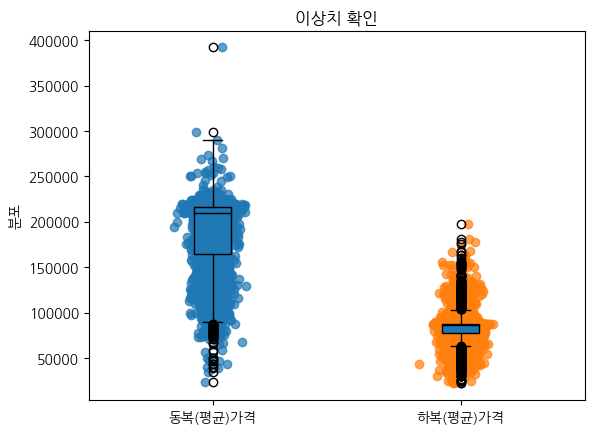

In [12]:
# 이상치 확인

import numpy as np


boxplot_data = [df_clean['동복(평균)가격'], df_clean['하복(평균)가격']]
labels = ['동복(평균)가격', '하복(평균)가격']

fig, ax = plt.subplots()
bplot = ax.boxplot(boxplot_data, labels=labels, patch_artist=True, medianprops={'color': 'black'})

# Scatter plot
for i, (label, data) in enumerate(zip(labels, boxplot_data)):
    y = data
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.7)

plt.title('이상치 확인')
plt.ylabel('분포')

plt.show()


In [13]:
import pandas as pd

# 이상치 제거 함수 정의
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# 이상치 제거 적용 '동복(평균)가격', '하복(평균)가격'
df_clean = remove_outliers_iqr(df_clean, '동복(평균)가격')
df_clean = remove_outliers_iqr(df_clean, '하복(평균)가격')

df_clean

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,동복구매방식(학교주관구매),...,동복구매방식(기타사유),동복구매방식(해당없음),동복(평균)가격,하복구매방식(학교주관구매),하복구매방식(공동구매),하복구매방식(개별구매),하복구매방식(기타),하복구매방식(기타사유),하복구매방식(해당없음),하복(평균)가격
1,서울특별시교육청,교육부,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,3,국립,N,NaN,○,...,NaN,NaN,215000.0,○,NaN,NaN,NaN,NaN,NaN,88000.0
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000698,개원중학교,3,공립,N,NaN,○,...,NaN,NaN,155000.0,○,NaN,NaN,NaN,NaN,NaN,65000.0
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S010000700,경원중학교,3,공립,N,NaN,○,...,NaN,NaN,224040.0,○,NaN,NaN,NaN,NaN,NaN,90530.0
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000701,구룡중학교,3,공립,N,NaN,○,...,NaN,NaN,214000.0,○,NaN,NaN,NaN,NaN,NaN,77000.0
5,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000702,압구정중학교,3,공립,N,NaN,○,...,NaN,NaN,152000.0,○,NaN,NaN,NaN,NaN,NaN,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000436,제주중학교,3,사립,N,NaN,○,...,NaN,NaN,217000.0,○,NaN,NaN,NaN,NaN,NaN,87000.0
3268,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000438,한라중학교,3,공립,N,NaN,○,...,NaN,NaN,208000.0,○,NaN,NaN,NaN,NaN,NaN,87000.0
3269,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000835,노형중학교,3,공립,N,NaN,○,...,NaN,NaN,217000.0,○,NaN,NaN,NaN,NaN,NaN,88000.0
3270,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000838,오름중학교,3,공립,N,NaN,○,...,NaN,NaN,217000.0,○,NaN,NaN,NaN,NaN,NaN,88000.0


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2953 entries, 1 to 3271
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시도교육청           2953 non-null   object 
 1   지역교육청           2953 non-null   object 
 2   지역              2953 non-null   object 
 3   정보공시 학교코드       2953 non-null   object 
 4   학교명             2953 non-null   object 
 5   학교급코드           2953 non-null   int64  
 6   설립구분            2953 non-null   object 
 7   제외여부            2953 non-null   object 
 8   제외사유            0 non-null      object 
 9   동복구매방식(학교주관구매)  2862 non-null   object 
 10  동복구매방식(공동구매)    91 non-null     object 
 11  동복구매방식(개별구매)    0 non-null      object 
 12  동복구매방식(기타)      0 non-null      object 
 13  동복구매방식(기타사유)    0 non-null      object 
 14  동복구매방식(해당없음)    0 non-null      object 
 15  동복(평균)가격        2953 non-null   float64
 16  하복구매방식(학교주관구매)  2862 non-null   object 
 17  하복구매방식(공동구매)    91 non-null     object

In [12]:
df_clean

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,동복구매방식(학교주관구매),...,동복구매방식(기타사유),동복구매방식(해당없음),동복(평균)가격,하복구매방식(학교주관구매),하복구매방식(공동구매),하복구매방식(개별구매),하복구매방식(기타),하복구매방식(기타사유),하복구매방식(해당없음),하복(평균)가격
1,서울특별시교육청,교육부,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,3,국립,N,NaN,○,...,NaN,NaN,215000.0,○,NaN,NaN,NaN,NaN,NaN,88000.0
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000698,개원중학교,3,공립,N,NaN,○,...,NaN,NaN,155000.0,○,NaN,NaN,NaN,NaN,NaN,65000.0
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S010000700,경원중학교,3,공립,N,NaN,○,...,NaN,NaN,224040.0,○,NaN,NaN,NaN,NaN,NaN,90530.0
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000701,구룡중학교,3,공립,N,NaN,○,...,NaN,NaN,214000.0,○,NaN,NaN,NaN,NaN,NaN,77000.0
5,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000702,압구정중학교,3,공립,N,NaN,○,...,NaN,NaN,152000.0,○,NaN,NaN,NaN,NaN,NaN,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000436,제주중학교,3,사립,N,NaN,○,...,NaN,NaN,217000.0,○,NaN,NaN,NaN,NaN,NaN,87000.0
3268,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000438,한라중학교,3,공립,N,NaN,○,...,NaN,NaN,208000.0,○,NaN,NaN,NaN,NaN,NaN,87000.0
3269,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000835,노형중학교,3,공립,N,NaN,○,...,NaN,NaN,217000.0,○,NaN,NaN,NaN,NaN,NaN,88000.0
3270,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000838,오름중학교,3,공립,N,NaN,○,...,NaN,NaN,217000.0,○,NaN,NaN,NaN,NaN,NaN,88000.0


In [13]:
# 데이터프레임 '지역'열에 띄어쓰기가 들어간 부분 버리고 새로운 데이터프레임에 할당
df2 = df_clean
# '지역' 열의 띄어쓰기를 기준으로 분리하여 첫 번째 단어만 선택
df2['지역'] = df2['지역'].str.split().str[0]
df2.head(3)

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,동복구매방식(학교주관구매),...,동복구매방식(기타사유),동복구매방식(해당없음),동복(평균)가격,하복구매방식(학교주관구매),하복구매방식(공동구매),하복구매방식(개별구매),하복구매방식(기타),하복구매방식(기타사유),하복구매방식(해당없음),하복(평균)가격
1,서울특별시교육청,교육부,서울특별시,S000003562,서울대학교사범대학부설여자중학교,3,국립,N,NaN,○,...,NaN,NaN,215000.0,○,NaN,NaN,NaN,NaN,NaN,88000.0
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시,S010000698,개원중학교,3,공립,N,NaN,○,...,NaN,NaN,155000.0,○,NaN,NaN,NaN,NaN,NaN,65000.0
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시,S010000700,경원중학교,3,공립,N,NaN,○,...,NaN,NaN,224040.0,○,NaN,NaN,NaN,NaN,NaN,90530.0


In [14]:
# 지역열을 기준으로 동복, 하복 가격 열의 평균을 내고, 묶음
df3 = df2.groupby('지역')[['동복(평균)가격', '하복(평균)가격']].mean().reset_index()

# 동복열을 기준으로 정렬
df3_sort = df3.sort_values(by='동복(평균)가격')
df3_sort

,지역,동복(평균)가격,하복(평균)가격
10,울산광역시,147040.625000,76745.312500
7,부산광역시,156195.182353,74775.011765
5,대구광역시,163165.040650,79729.186992
13,전라북도,168462.937500,86998.710227
4,광주광역시,168665.584416,85250.649351
8,서울특별시,174340.708215,75064.759207
11,인천광역시,177058.758865,83664.560284
2,경상남도,188847.090047,77174.199052
1,경기도,193212.901716,86257.744150
3,경상북도,203676.896970,86929.096970


In [15]:
# 하복 열을 기준으로 정렬
df3_sort2 = df3.sort_values(by='하복(평균)가격')
df3_sort2

,지역,동복(평균)가격,하복(평균)가격
16,충청북도,211985.052174,73968.982609
7,부산광역시,156195.182353,74775.011765
8,서울특별시,174340.708215,75064.759207
10,울산광역시,147040.625000,76745.312500
2,경상남도,188847.090047,77174.199052
5,대구광역시,163165.040650,79729.186992
15,충청남도,205276.812500,83549.221591
11,인천광역시,177058.758865,83664.560284
14,제주특별자치도,216954.545455,85068.181818
4,광주광역시,168665.584416,85250.649351


In [19]:
# 지역별로 그룹바이
df4 = df_clean

# 지역열을 기준으로 동복, 하복 가격 열의 평균을 내고, 묶음
df = df4.groupby('지역')[['동복(평균)가격', '하복(평균)가격']].mean().reset_index()
# '지역' 열의 띄어쓰기를 기준으로 분리하여 첫 번째 단어만 선택
df4['도'] = df4['지역'].str.split().str[0]

df4

,지역,동복(평균)가격,하복(평균)가격,도
0,강원특별자치도,208153.000000,88530.533333,강원특별자치도
1,경기도,193212.901716,86257.744150,경기도
2,경상남도,188847.090047,77174.199052,경상남도
3,경상북도,203676.896970,86929.096970,경상북도
4,광주광역시,168665.584416,85250.649351,광주광역시
5,대구광역시,163165.040650,79729.186992,대구광역시
6,대전광역시,215057.079545,87609.465909,대전광역시
7,부산광역시,156195.182353,74775.011765,부산광역시
8,서울특별시,174340.708215,75064.759207,서울특별시
9,세종특별자치시,218155.769231,87328.846154,세종특별자치시


### 3. 데이터 시각화

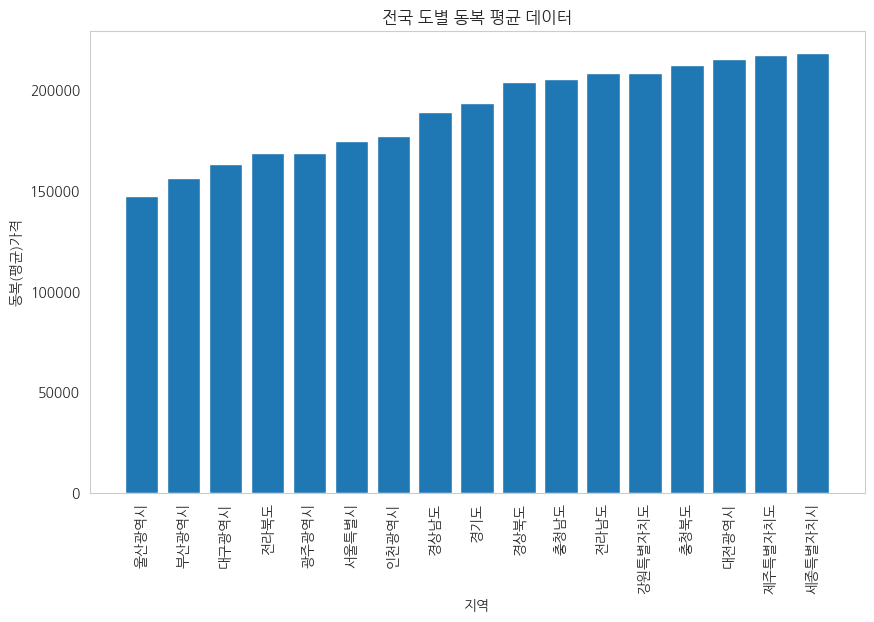

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rc('font', family=font_name)

plt.figure(figsize=(10, 6))
plt.bar(df3_sort['지역'], df3_sort['동복(평균)가격'])
plt.xlabel('지역')
plt.ylabel('동복(평균)가격')
plt.title('전국 도별 동복 평균 데이터')
plt.xticks(df3_sort['지역'], rotation=90)
plt.grid(False)
plt.show()


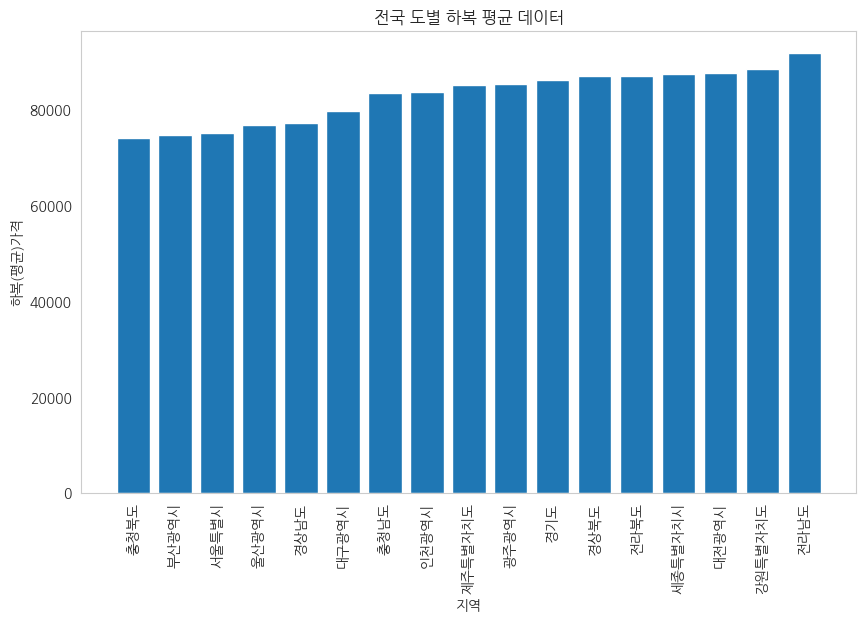

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rc('font', family=font_name)

plt.figure(figsize=(10, 6))
plt.bar(df3_sort2['지역'], df3_sort2['하복(평균)가격'])
plt.xlabel('지역')
plt.ylabel('하복(평균)가격')
plt.title('전국 도별 하복 평균 데이터')
plt.xticks(df3_sort2['지역'], rotation=90)
plt.grid(False)
plt.show()


### 전국 동복

In [ ]:
df = pd.read_csv("2022년도_교복 구매 유형 및 단가(중)_전체.csv")

# 결측치 제거
df_clean = df
df_clean.dropna(subset=['지역', '설립구분', '동복(평균)가격', '하복(평균)가격'], inplace=True)

# 지역별로 그룹바이
df4 = df_clean
df4

In [31]:
# 지역열을 기준으로 동복, 하복 가격 열의 평균을 내고, 묶음
df4 = df4.groupby('지역')[['동복(평균)가격', '하복(평균)가격']].mean().reset_index()
# '지역' 열의 띄어쓰기를 기준으로 분리하여 첫 번째 단어만 선택
df4['도'] = df4['지역'].str.split().str[0]
df4

,지역,동복(평균)가격,하복(평균)가격,도
0,강원특별자치도 강릉시,208916.666667,87850.000000,강원특별자치도
1,강원특별자치도 고성군,168000.000000,82500.000000,강원특별자치도
2,강원특별자치도 동해시,218214.285714,88214.285714,강원특별자치도
3,강원특별자치도 삼척시,220265.000000,88885.000000,강원특별자치도
4,강원특별자치도 속초시,205000.000000,97250.000000,강원특별자치도
...,...,...,...,...
245,충청북도 청주시 상당구,206076.923077,75538.461538,충청북도
246,충청북도 청주시 서원구,210407.333333,74975.111111,충청북도
247,충청북도 청주시 청원구,214923.333333,70965.555556,충청북도
248,충청북도 청주시 흥덕구,216000.000000,68714.285714,충청북도


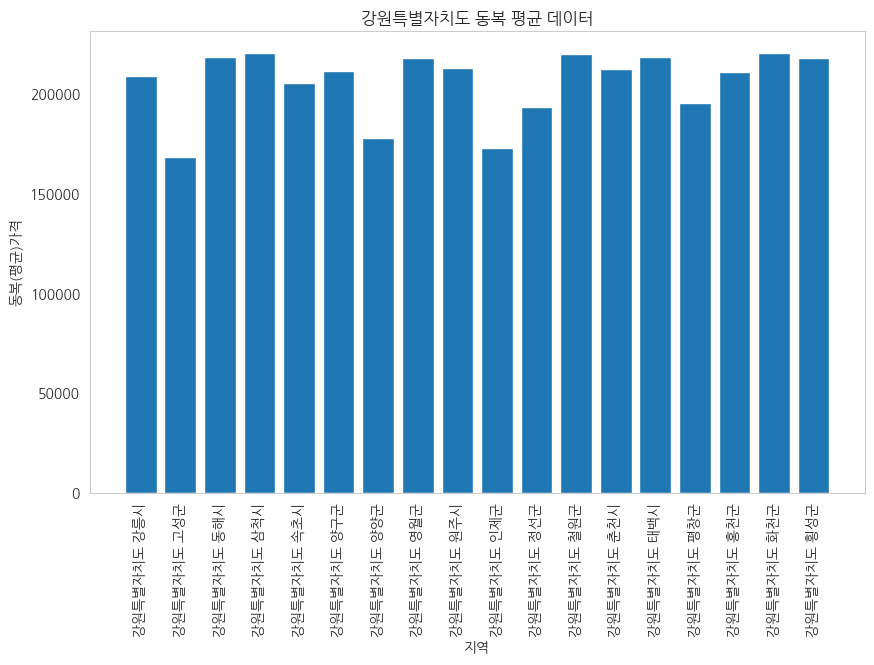

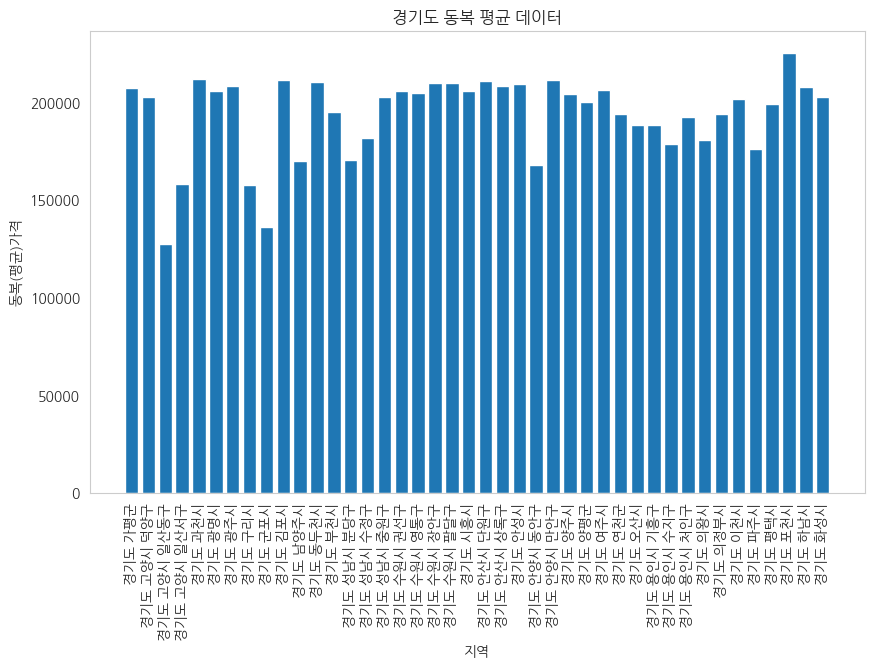

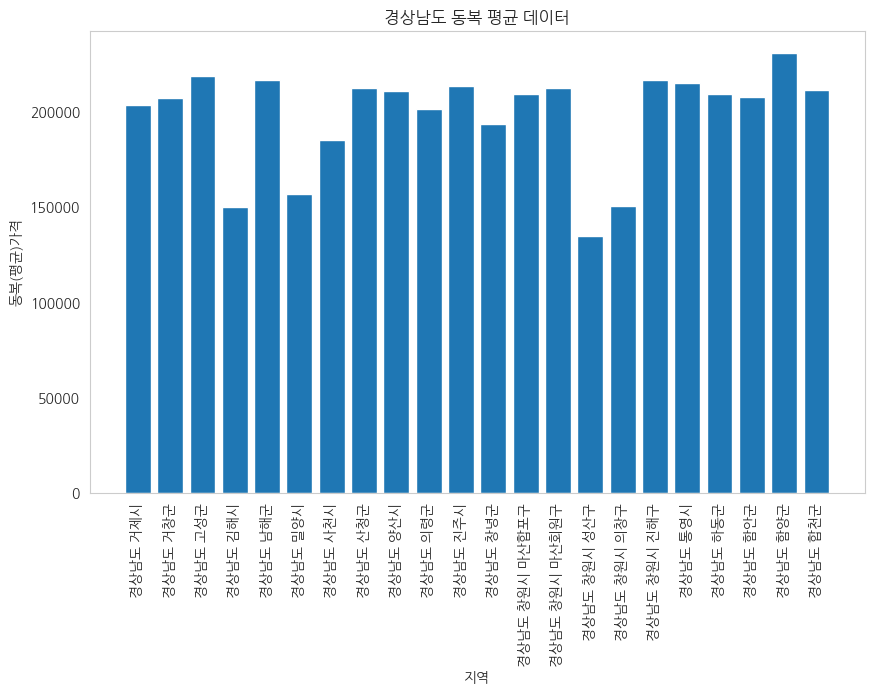

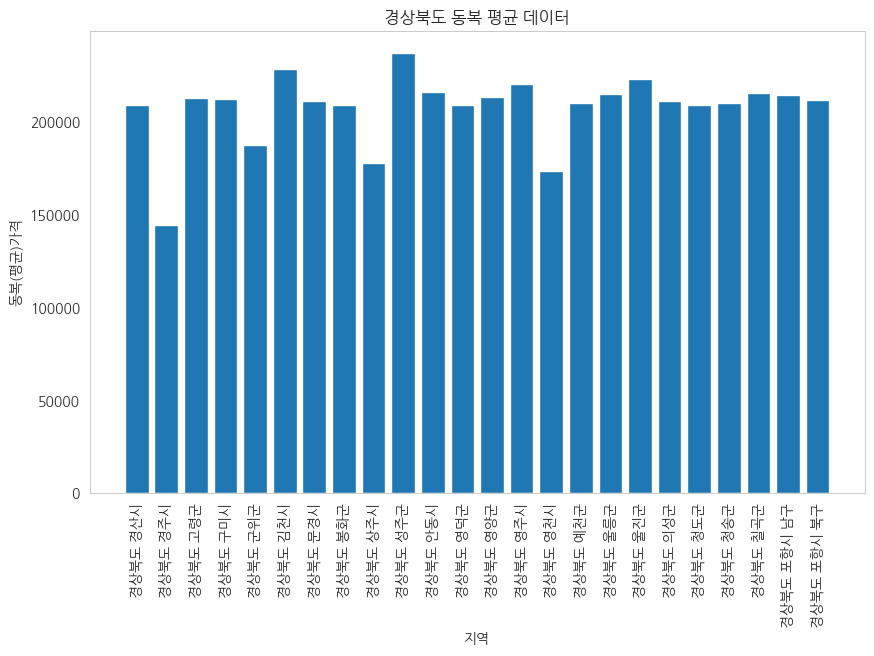

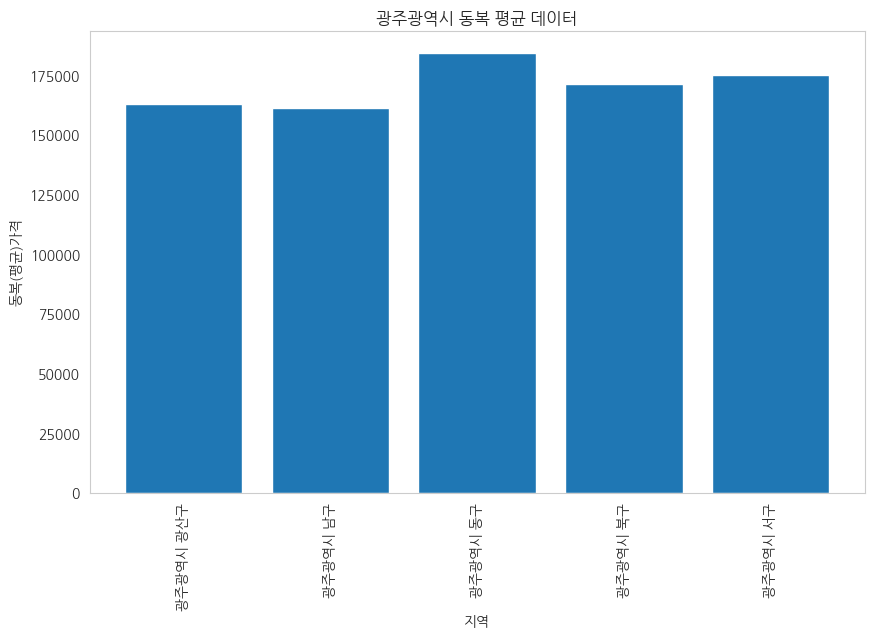

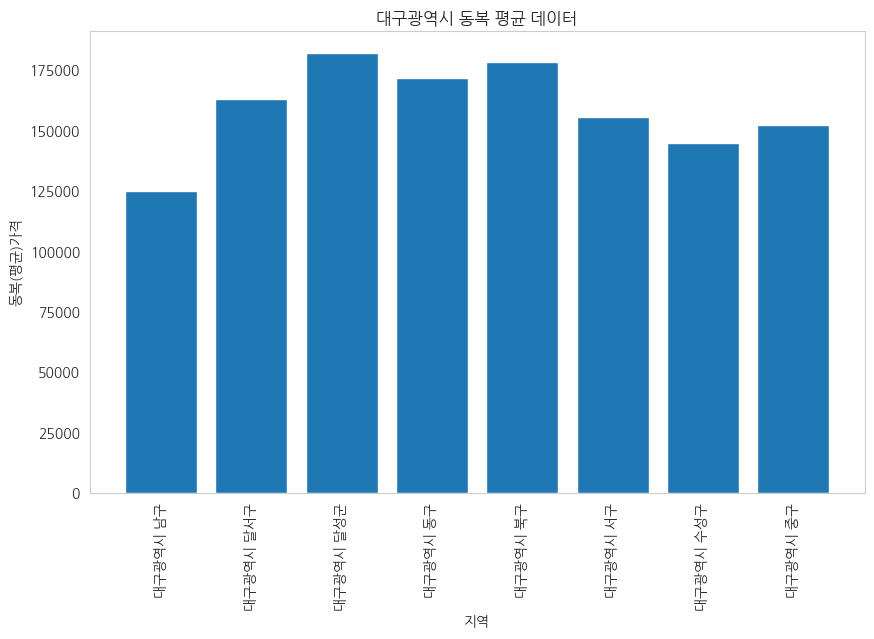

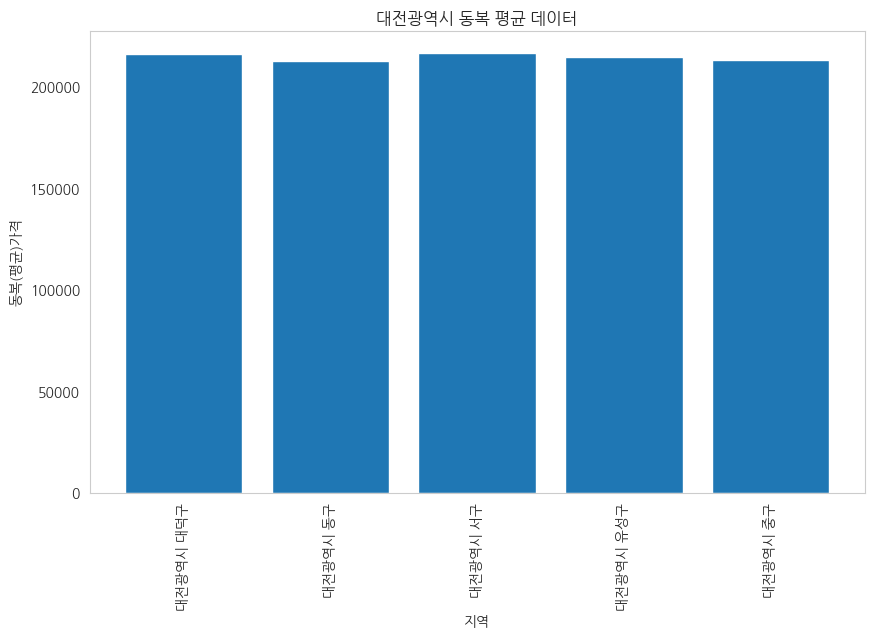

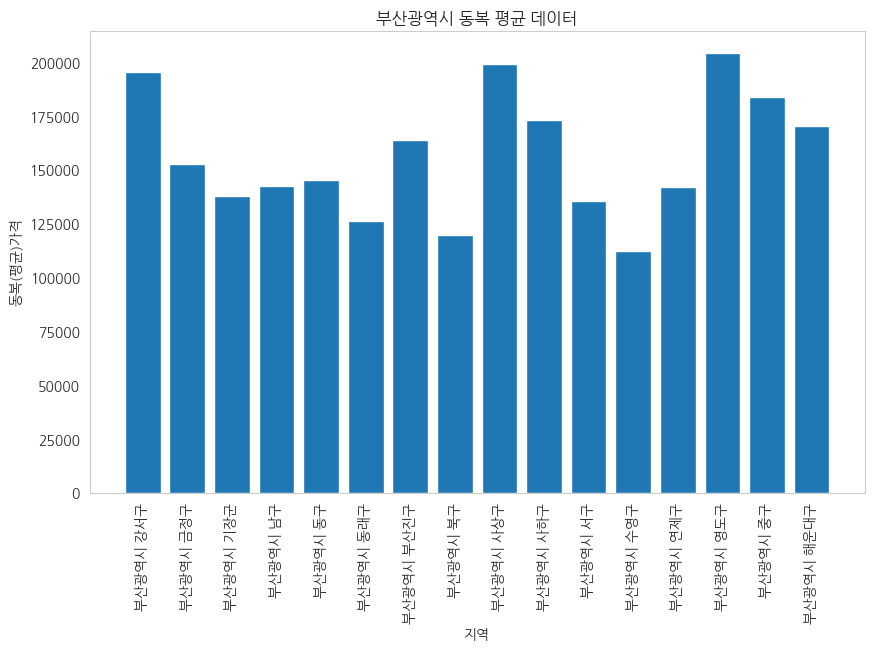

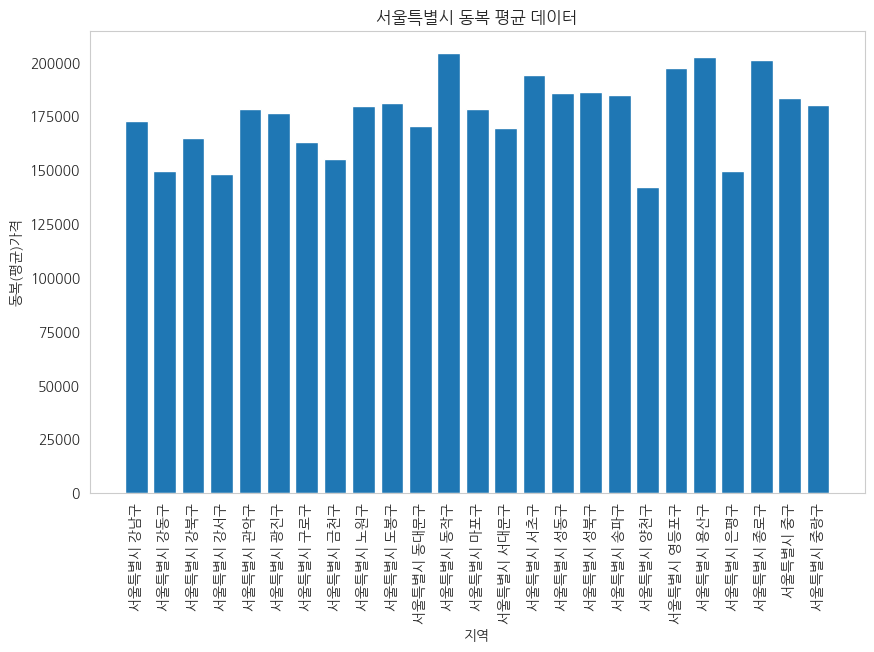

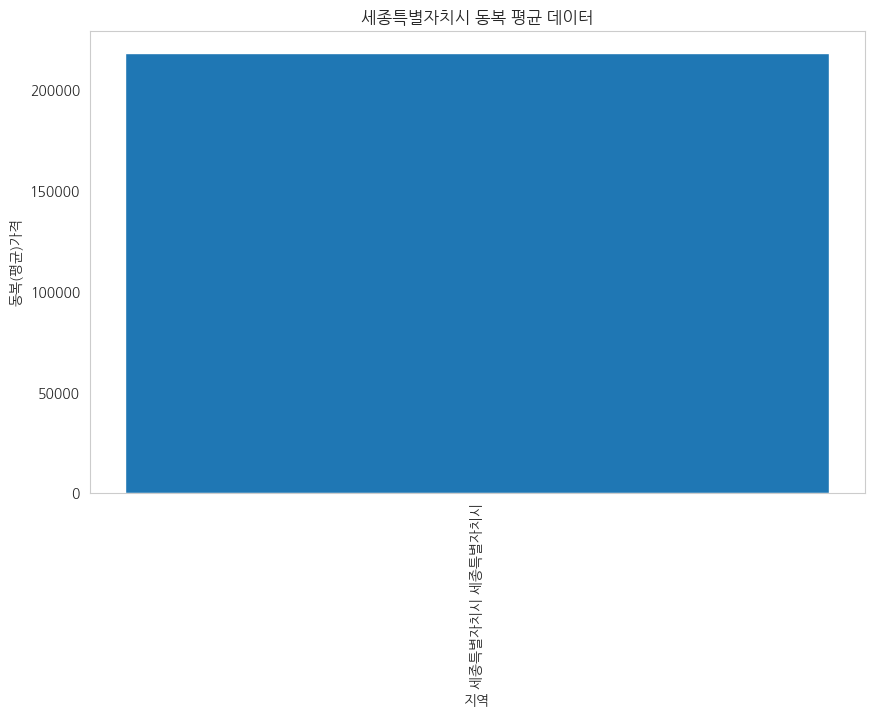

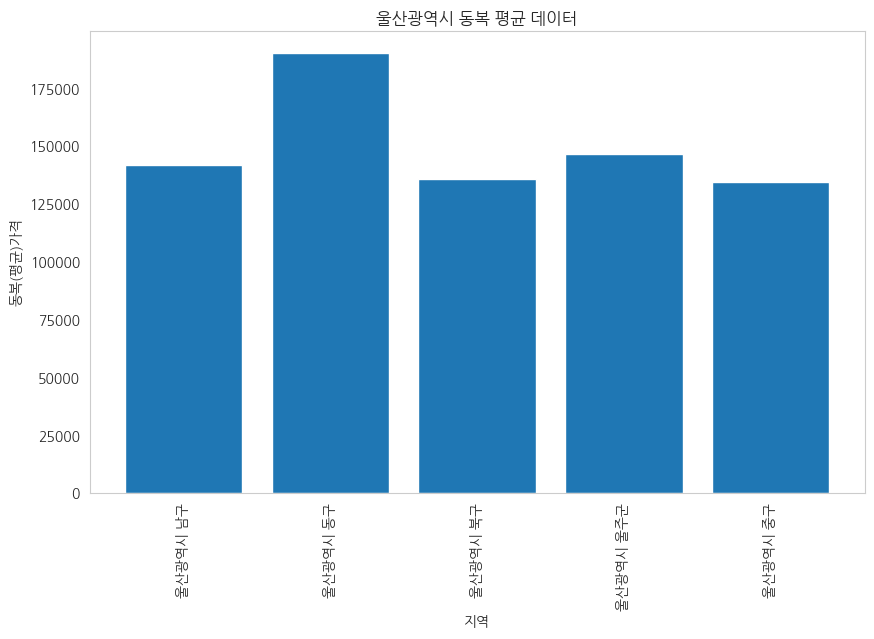

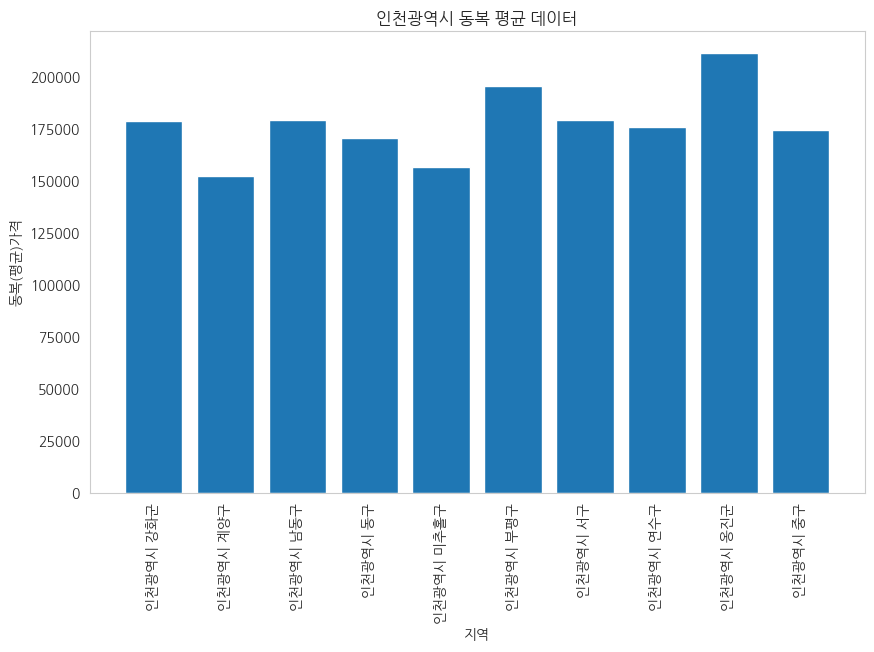

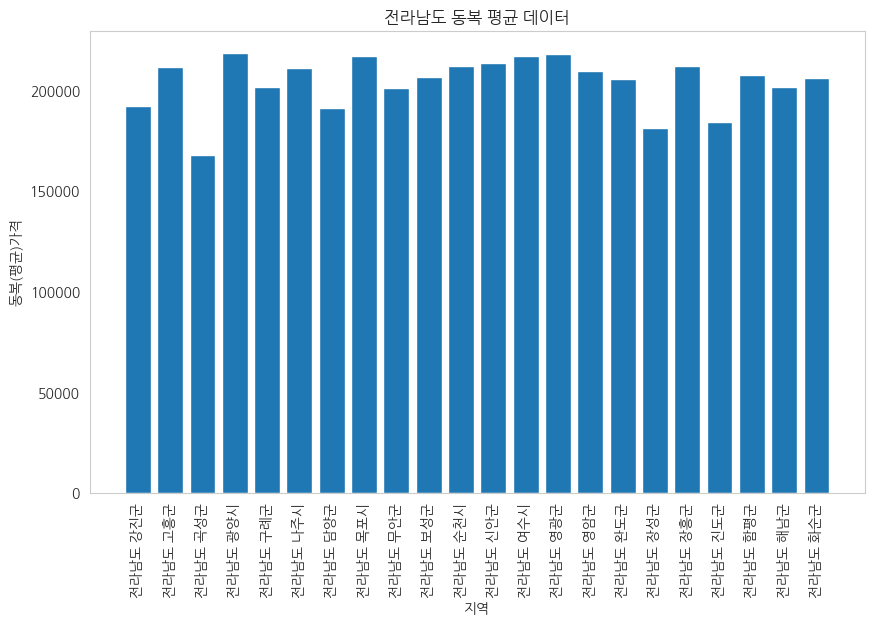

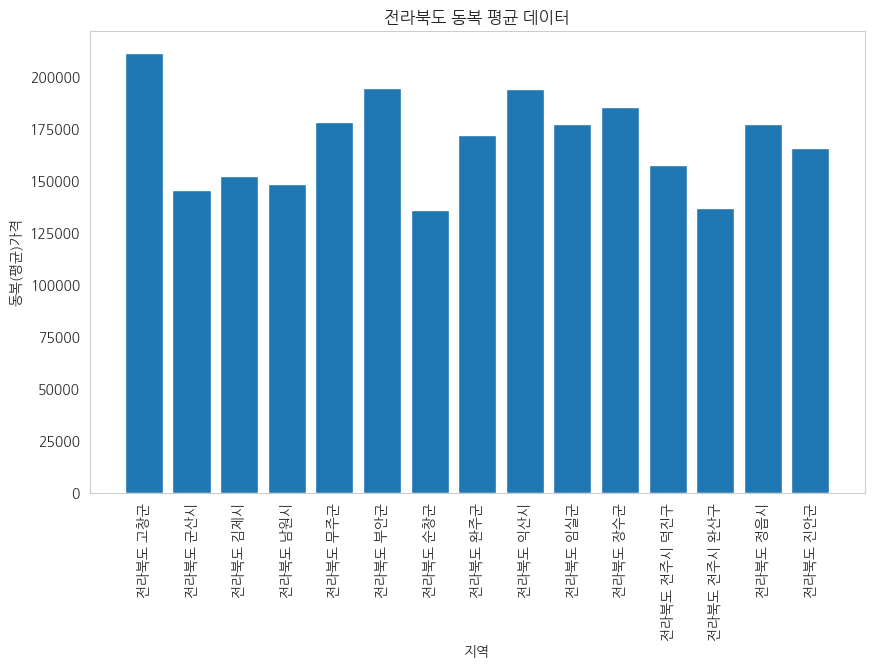

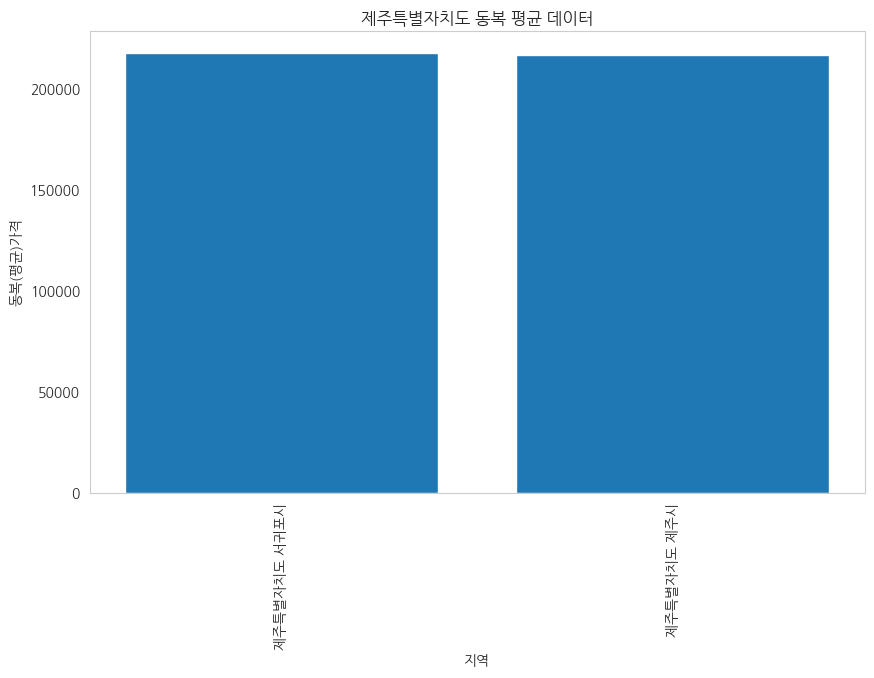

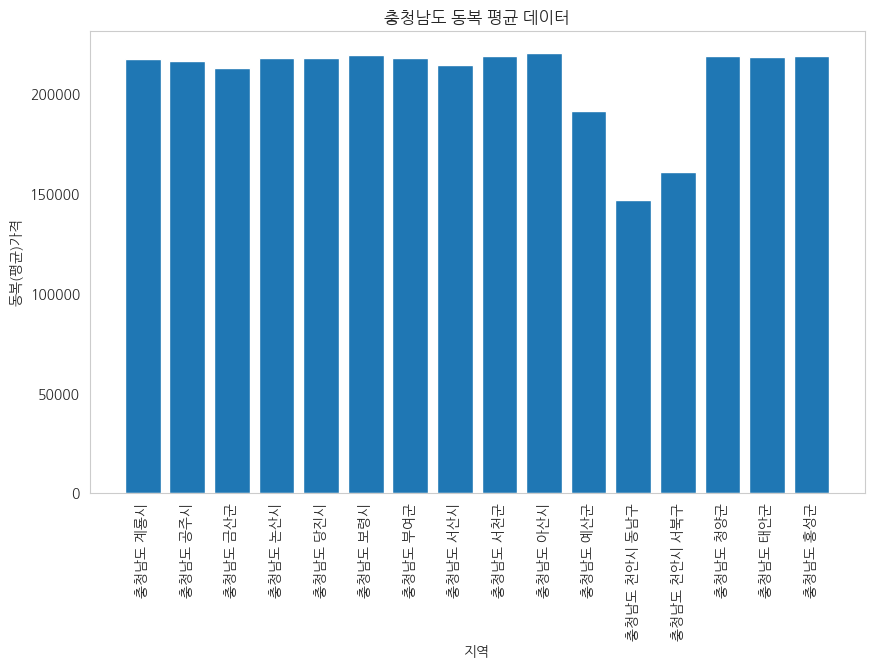

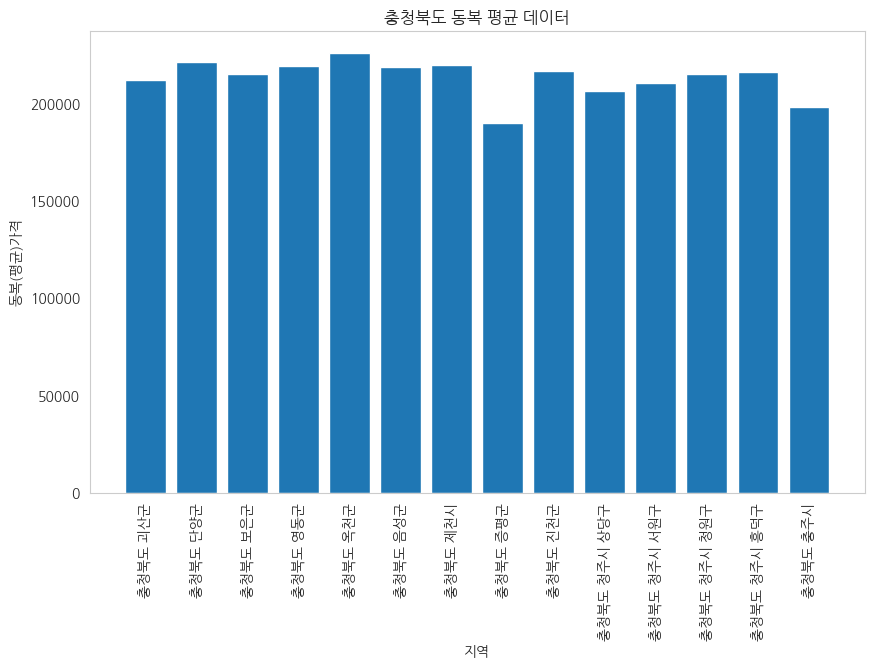

In [33]:
#  '도' 열의 고유한 값을 가져오기
unique_do = df4['도'].unique()

# 각 '도' 값을 기준으로 서브 데이터 프레임(sub_data)을 만들고 그래프를 그리기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rc('font', family=font_name)

for do in unique_do:
    sub_data = df4[df4['도'] == do]
    plt.figure(figsize=(10, 6))
    plt.bar(sub_data['지역'], sub_data['동복(평균)가격'])
    plt.xlabel('지역')
    plt.ylabel('동복(평균)가격')
    plt.title(f'{do} 동복 평균 데이터')
    plt.xticks(sub_data['지역'], rotation=90)
    plt.grid(False)
    plt.show()


### 전국 하복

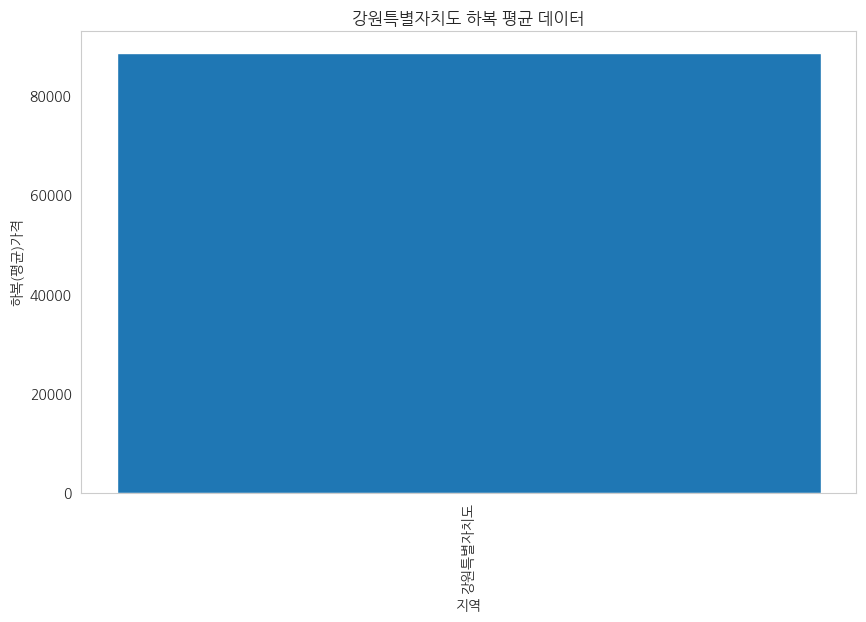

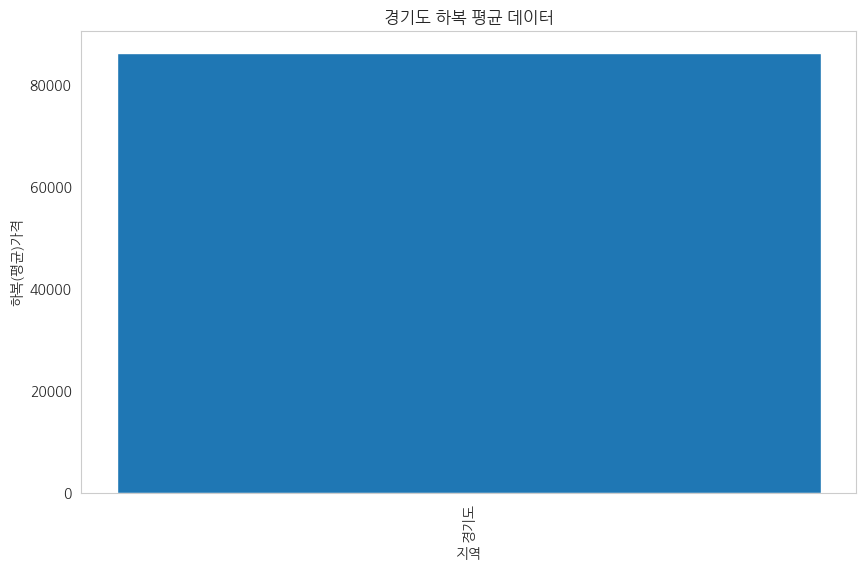

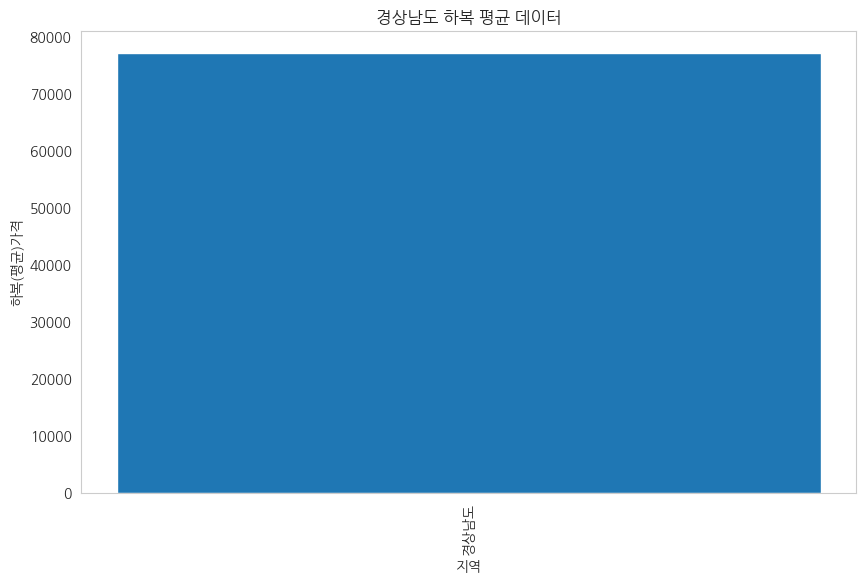

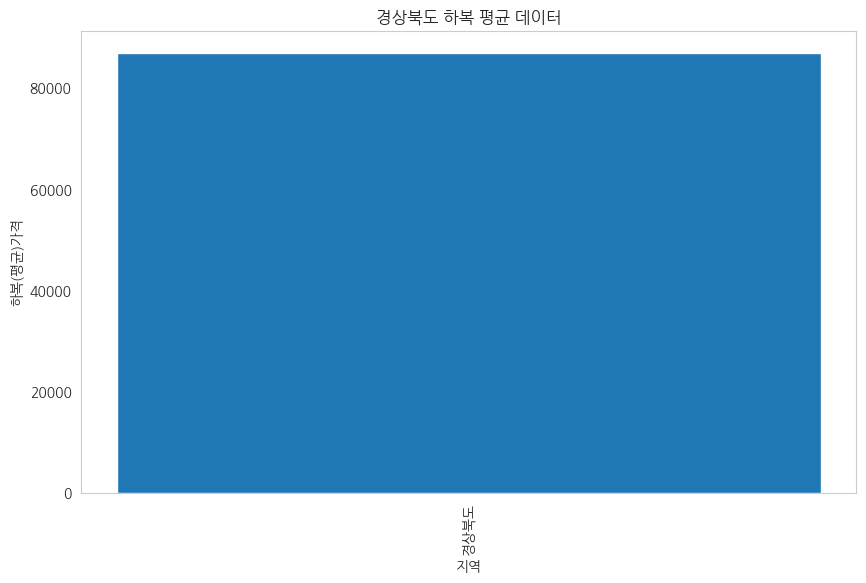

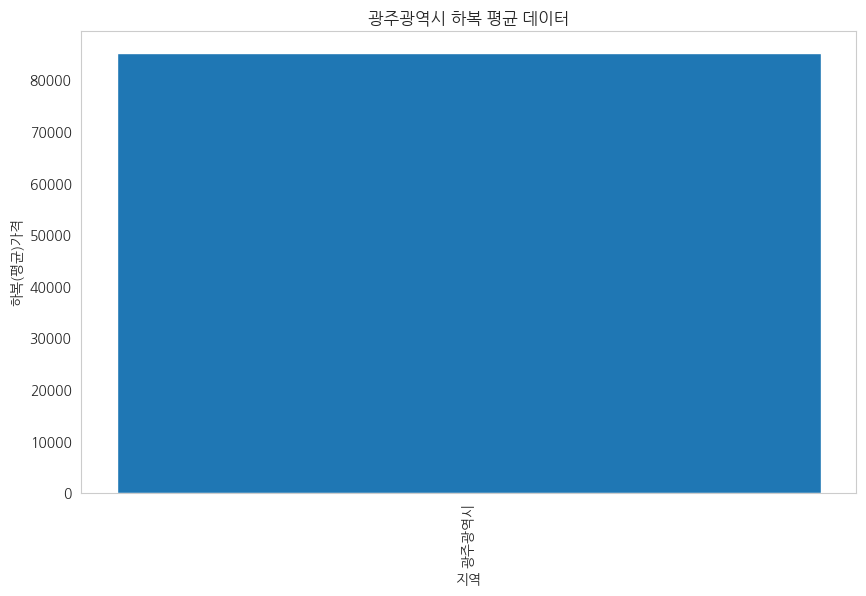

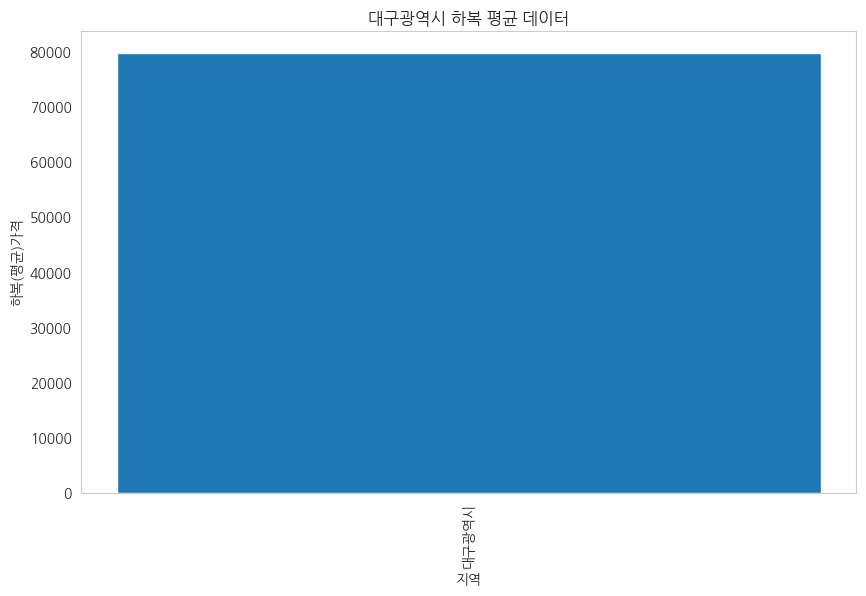

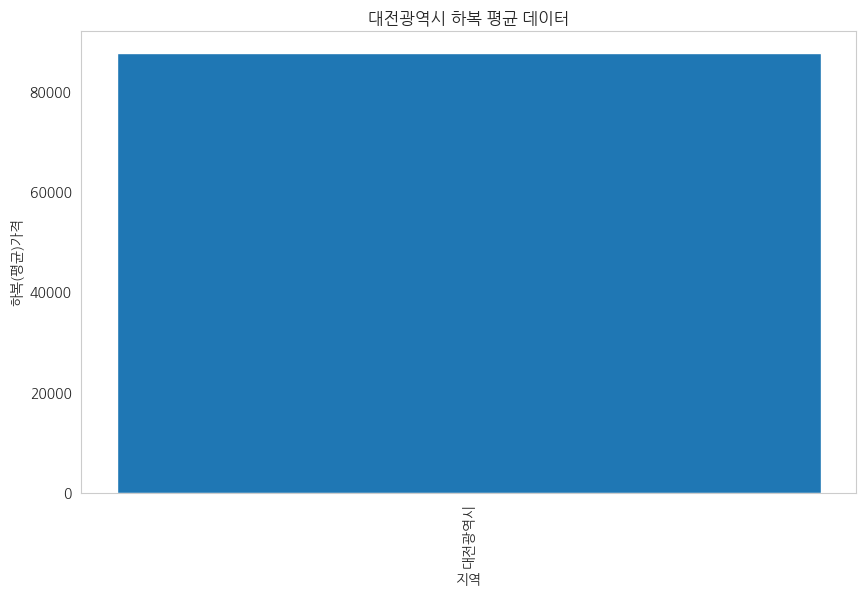

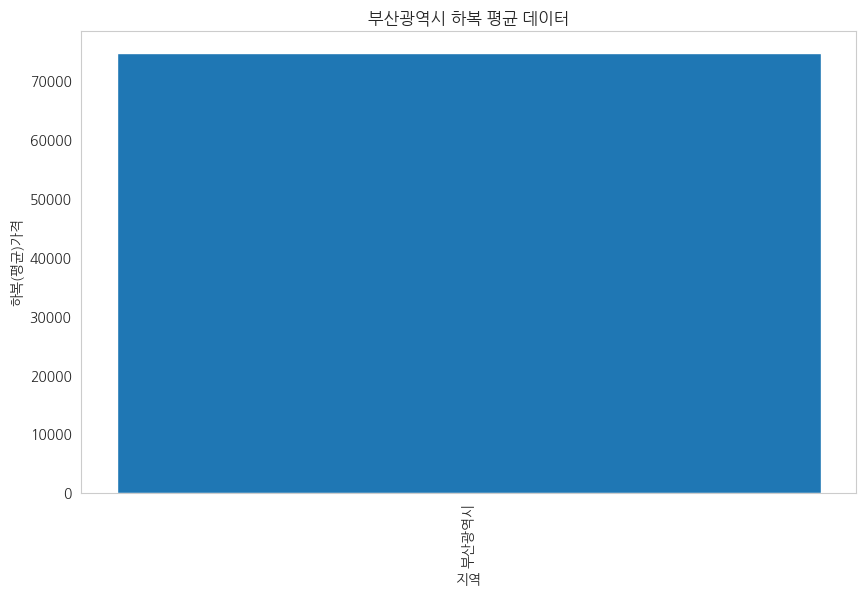

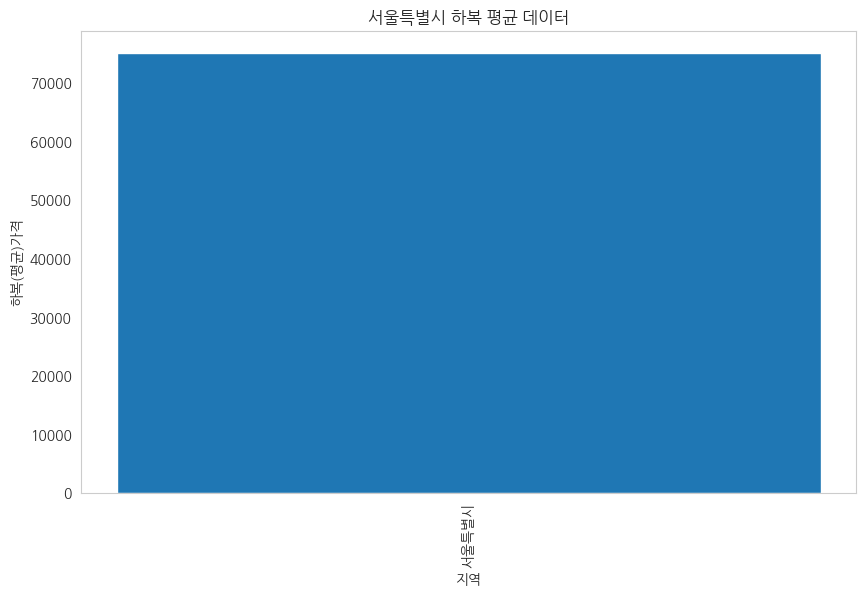

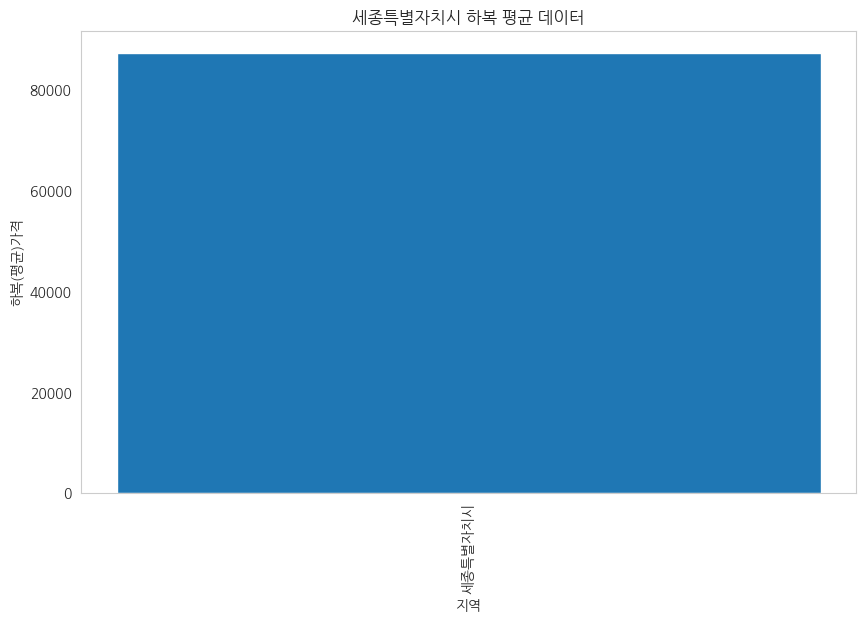

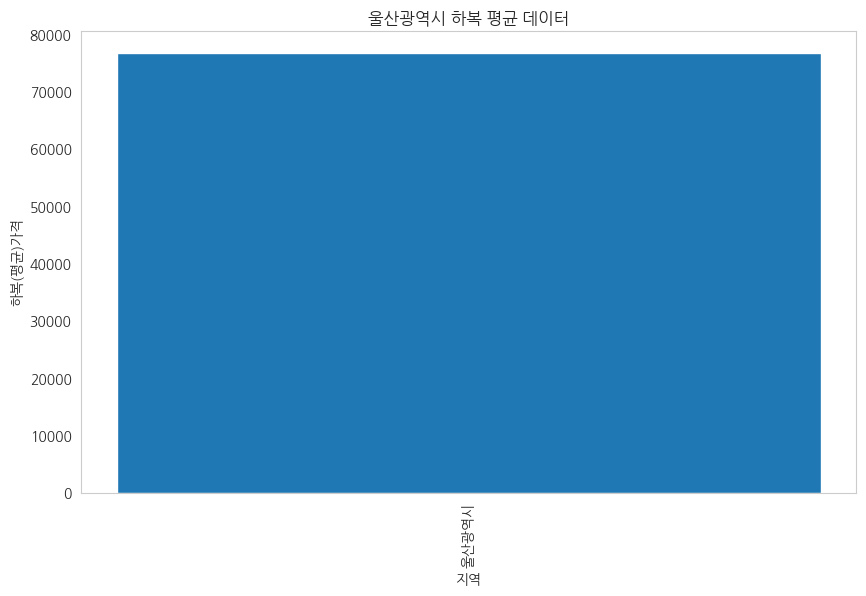

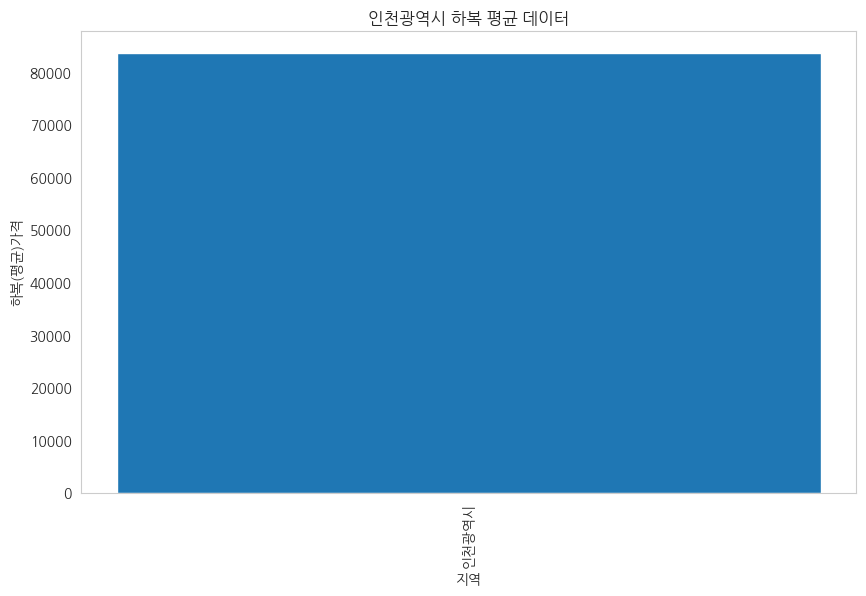

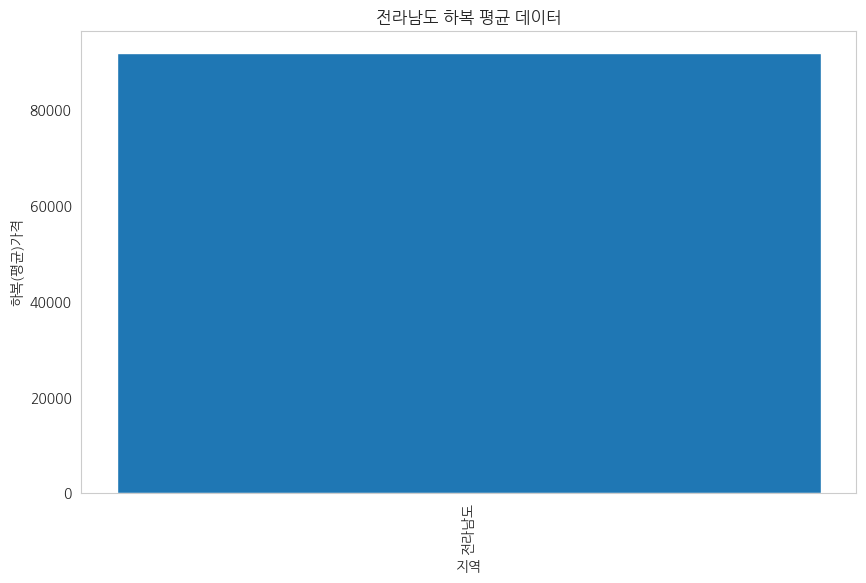

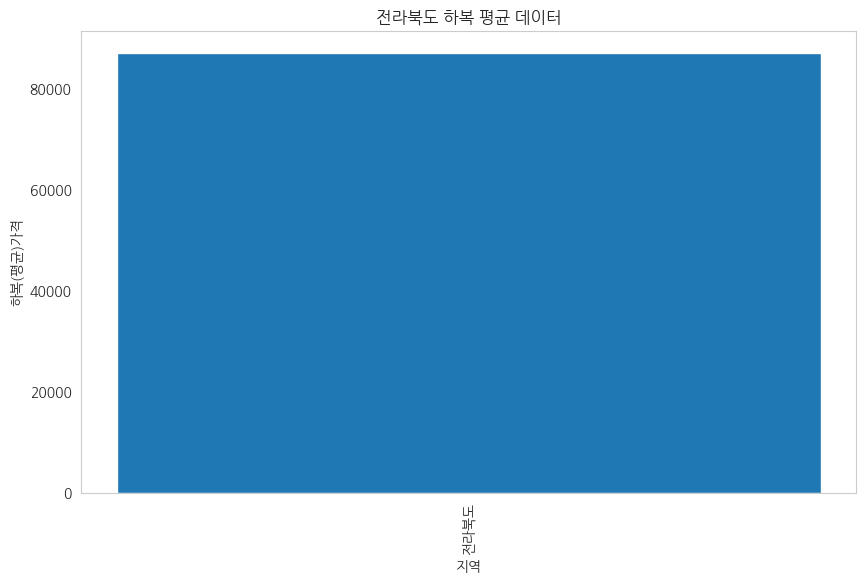

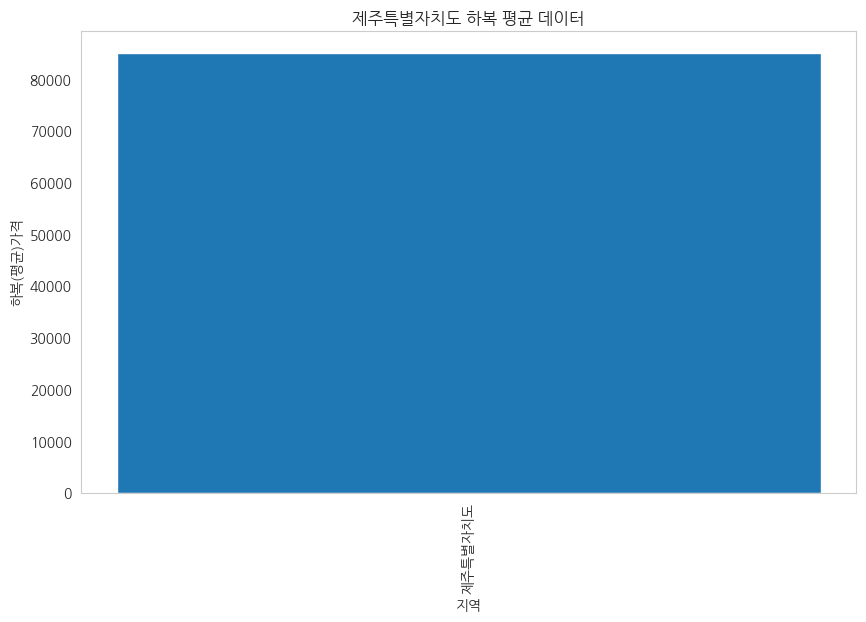

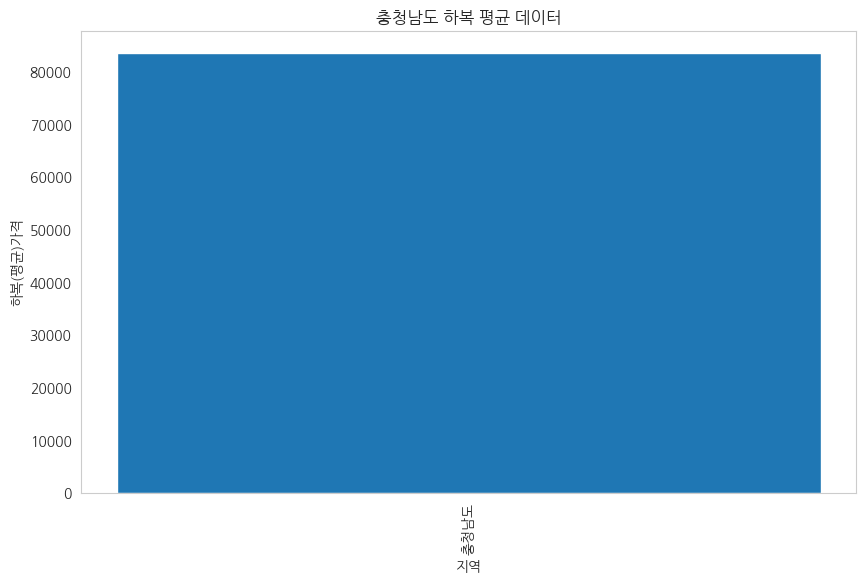

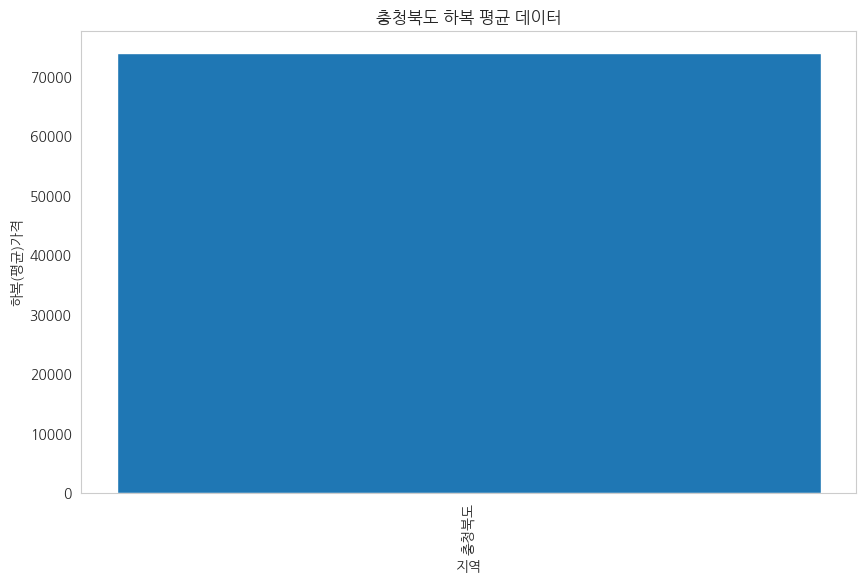

In [17]:
#  '도' 열의 고유한 값을 가져오기
unique_do = df4['도'].unique()

# 각 '도' 값을 기준으로 서브 데이터 프레임(sub_data)을 만들고 그래프를 그리기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rc('font', family=font_name)

for do in unique_do:
    sub_data = df4[df4['도'] == do]
    plt.figure(figsize=(10, 6))
    plt.bar(sub_data['지역'], sub_data['하복(평균)가격'])
    plt.xlabel('지역')
    plt.ylabel('하복(평균)가격')
    plt.title(f'{do} 하복 평균 데이터')
    plt.xticks(sub_data['지역'], rotation=90)
    plt.grid(False)
    plt.show()


### 설립 기준

In [18]:
df5 = df_clean
df5['도'] = df5['지역'].str.split().str[0]
df5 = df5.groupby(['설립구분', '도'])[['동복(평균)가격', '하복(평균)가격']].mean().reset_index()

In [19]:
df5

,설립구분,도,동복(평균)가격,하복(평균)가격
0,공립,강원특별자치도,207267.573529,88376.617647
1,공립,경기도,190987.279279,85938.897297
2,공립,경상남도,187864.565714,76795.645714
3,공립,경상북도,203293.208054,87324.167785
4,공립,광주광역시,170465.094340,84409.433962
5,공립,대구광역시,159632.022472,78850.786517
6,공립,대전광역시,215029.527778,87458.750000
7,공립,부산광역시,151668.007407,73042.607407
8,공립,서울특별시,170143.359375,73022.382812
9,공립,세종특별자치시,218155.769231,87328.846154


In [20]:
# '지역' 열의 띄어쓰기를 기준으로 분리하여 첫 번째 단어만 선택
#df5['지역'] = df5['지역'].str.split().str[0]
#df5

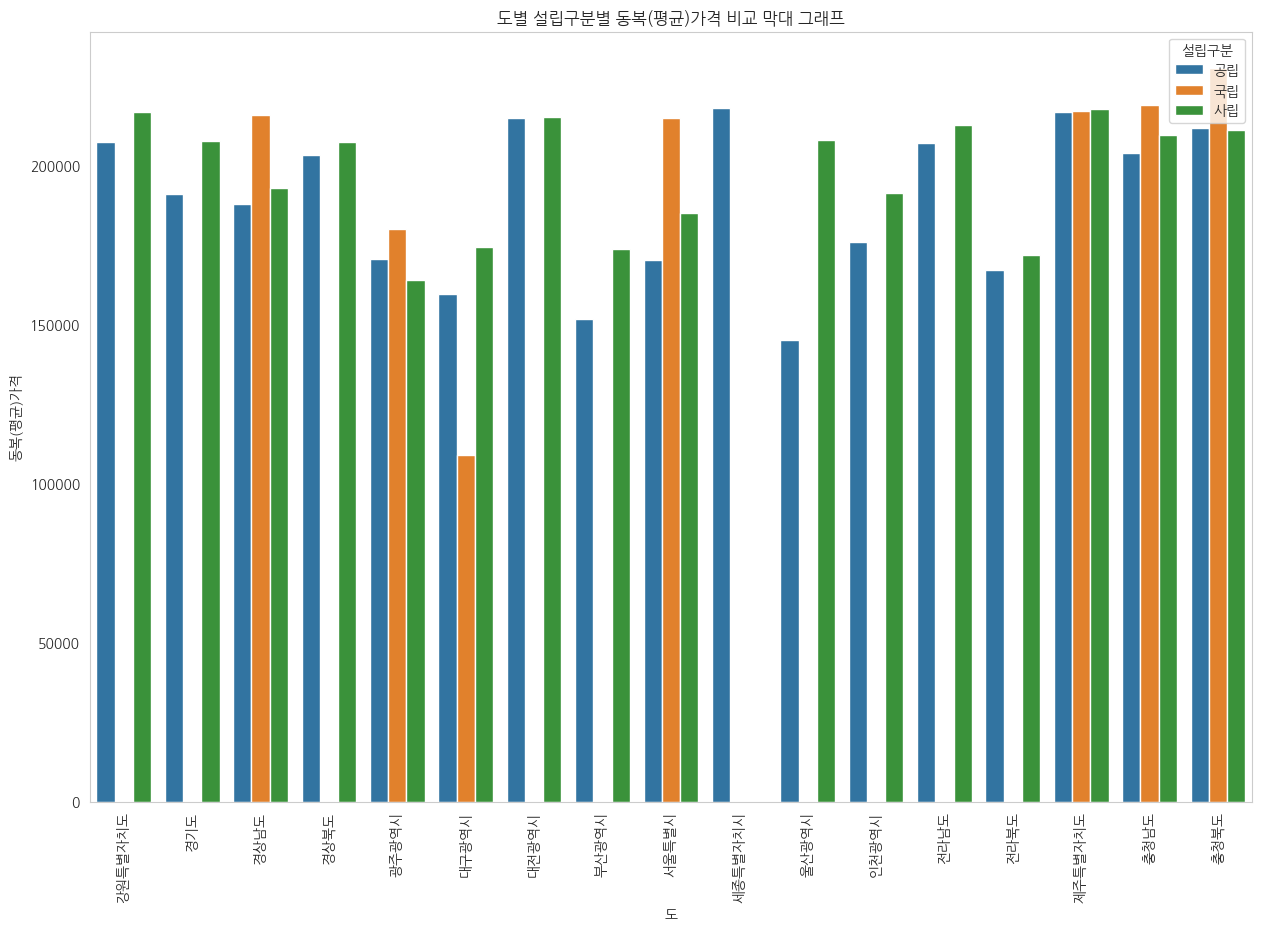

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rc('font', family=font_name)

plt.figure(figsize=(15, 10))
sns.barplot(x='도', y='동복(평균)가격', hue='설립구분', data=df5)
plt.xlabel('도')
plt.ylabel('동복(평균)가격')
plt.title('도별 설립구분별 동복(평균)가격 비교 막대 그래프')
plt.xticks(rotation=90)
plt.grid(False)
plt.legend(title='설립구분')
plt.show()


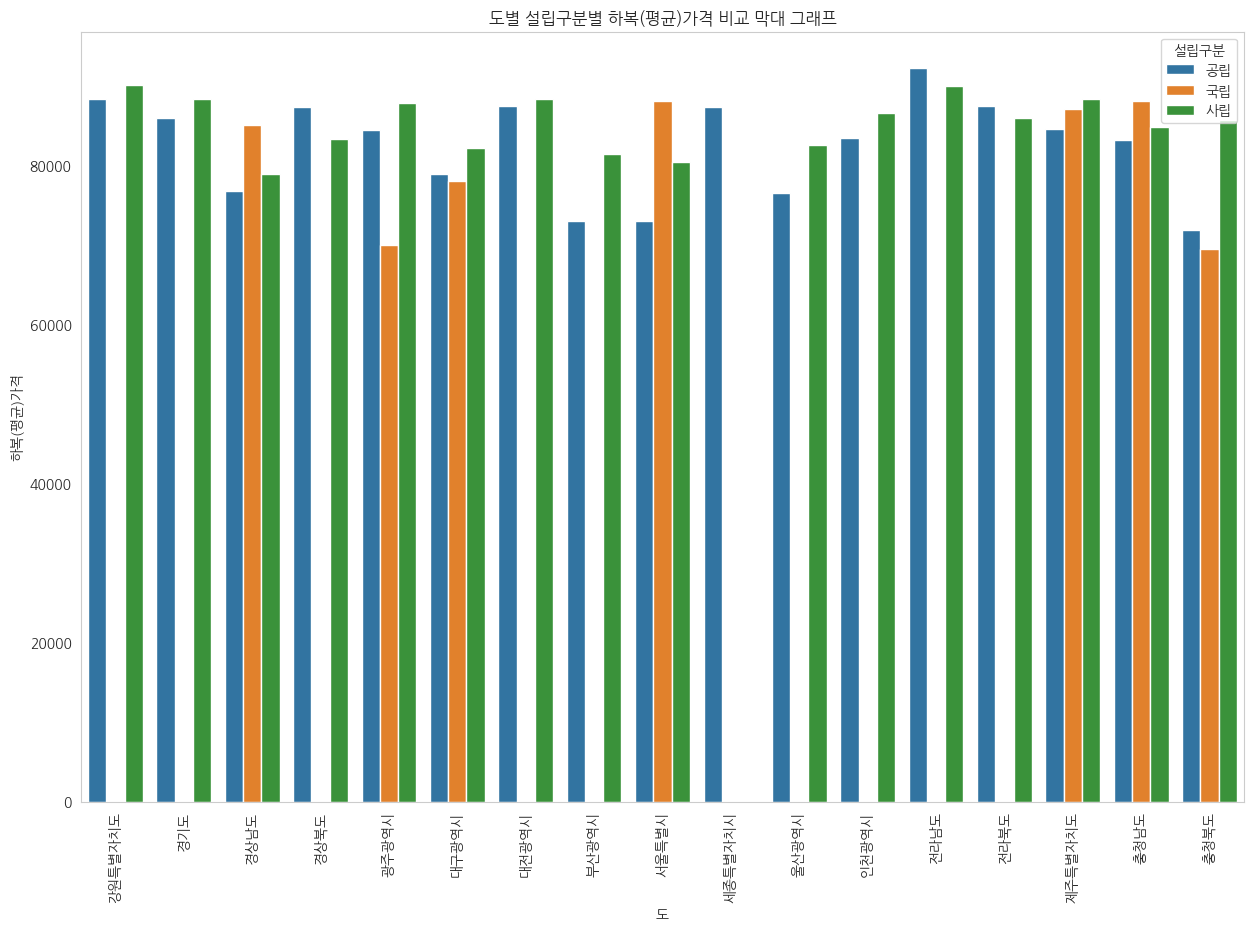

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rc('font', family=font_name)

plt.figure(figsize=(15, 10))
sns.barplot(x='도', y='하복(평균)가격', hue='설립구분', data=df5)
plt.xlabel('도')
plt.ylabel('하복(평균)가격')
plt.title('도별 설립구분별 하복(평균)가격 비교 막대 그래프')
plt.xticks(rotation=90)
plt.grid(False)
plt.legend(title='설립구분')
plt.show()


In [23]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder()
df5['설립구분'] = label.fit_transform(df5['설립구분'])
df5['도'] = label.fit_transform(df5['도'])


In [24]:
df5

,설립구분,도,동복(평균)가격,하복(평균)가격
0,0,0,207267.573529,88376.617647
1,0,1,190987.279279,85938.897297
2,0,2,187864.565714,76795.645714
3,0,3,203293.208054,87324.167785
4,0,4,170465.094340,84409.433962
5,0,5,159632.022472,78850.786517
6,0,6,215029.527778,87458.750000
7,0,7,151668.007407,73042.607407
8,0,8,170143.359375,73022.382812
9,0,9,218155.769231,87328.846154


C:\Users\thesw\AppData\Local\Temp\ipykernel_12076\2324571655.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df5.corr(), dtype=np.bool))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Wine Quality Correlation')

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


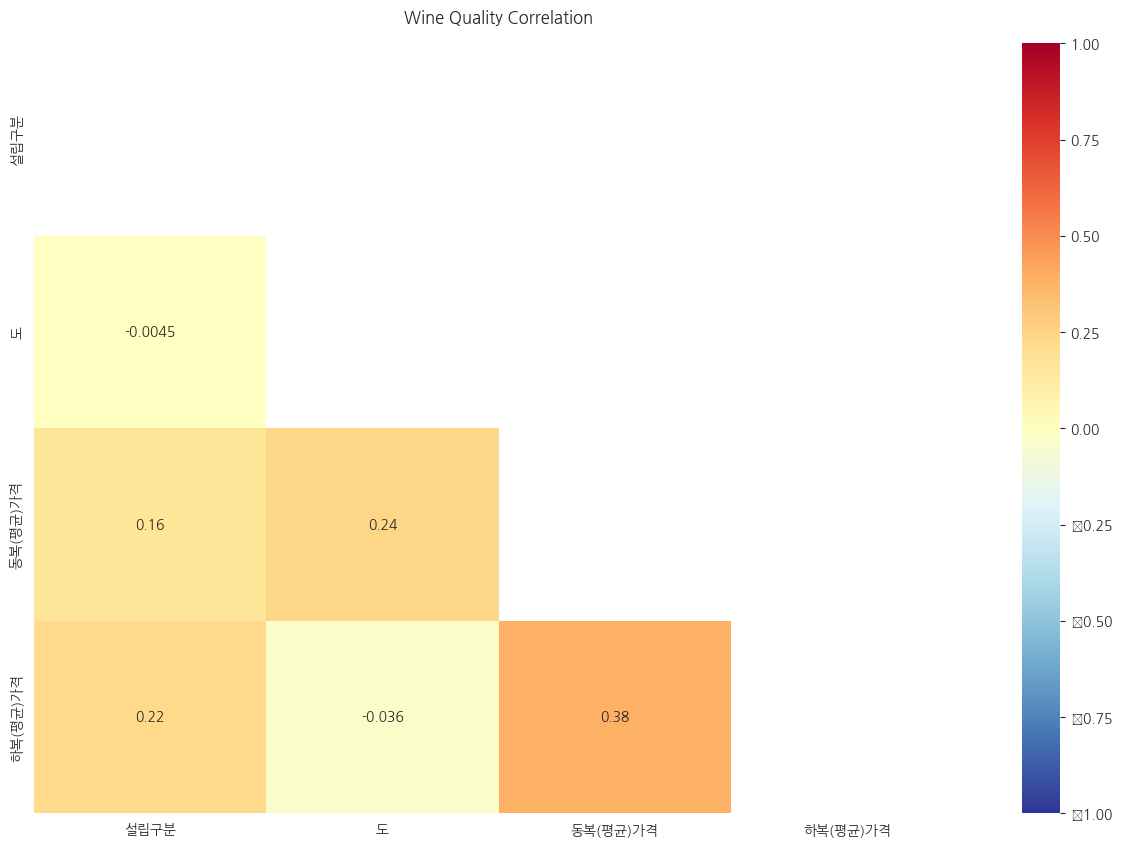

In [25]:
# 중복 제거 히트맵 시각화

import numpy as np

# 매트릭스의 우측 상단을 모두 True인 1로, 하단을 False인 0으로 변환.
np.triu(np.ones_like(df5.corr()))

# True/False mask 배열로 변환.
mask = np.triu(np.ones_like(df5.corr(), dtype=np.bool))

#  히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(15, 10))
plt.grid(False)
sns.heatmap(df5.corr(), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="RdYlBu_r", 
            cbar = True)
ax.set_title('Wine Quality Correlation', pad = 15)

구매방식에 따른 교복 가격 차이 분석

동복구매방식(학교주관구매)     383
동복구매방식(공동구매)      3181
동복구매방식(개별구매)      3176
동복구매방식(기타)        3243
동복구매방식(해당없음)      3264

하복구매방식(학교주관구매)     398
하복구매방식(공동구매)      3179
하복구매방식(개별구매)      3179
하복구매방식(기타)        3243
하복구매방식(해당없음)      3248

In [34]:
df = pd.read_csv("2022년도_교복 구매 유형 및 단가(중)_전체.csv")

In [35]:
# 결측치 제거
df_clean = df
df_clean.dropna(subset=['지역', '설립구분', '동복(평균)가격', '하복(평균)가격'], inplace=True)

In [36]:
df6 = df_clean
columns_to_change = ['동복구매방식(학교주관구매)', '동복구매방식(공동구매)', '동복구매방식(개별구매)', '동복구매방식(기타)', '동복구매방식(해당없음)',
                    '하복구매방식(학교주관구매)', '하복구매방식(공동구매)', '하복구매방식(개별구매)', '하복구매방식(기타)', '하복구매방식(해당없음)']

df6[columns_to_change] = df6[columns_to_change].fillna(0)
df6[columns_to_change] = df6[columns_to_change].applymap(lambda x: 1 if x != 0 else 0)

In [35]:
import pandas as pd

columns_to_check = ['동복구매방식(학교주관구매)', '동복구매방식(공동구매)', '동복구매방식(개별구매)', '동복구매방식(기타)', '동복구매방식(해당없음)']

average_prices = []

for col in columns_to_check:
    filtered_rows = df6[df6[col] == 1]
    average_price = filtered_rows['동복(평균)가격'].mean()
    average_prices.append([col, average_price])

average_prices_df = pd.DataFrame(average_prices, columns=['구매방식', '평균 가격'])

print(average_prices_df)


             구매방식          평균 가격
0  동복구매방식(학교주관구매)  188317.659329
1    동복구매방식(공동구매)  195912.186813
2    동복구매방식(개별구매)            NaN
3      동복구매방식(기타)            NaN
4    동복구매방식(해당없음)            NaN


In [36]:
import pandas as pd

columns_to_check = ['하복구매방식(학교주관구매)', '하복구매방식(공동구매)', '하복구매방식(개별구매)', '하복구매방식(기타)', '하복구매방식(해당없음)']

average_prices = []

for col in columns_to_check:
    filtered_rows = df6[df6[col] == 1]
    average_price = filtered_rows['하복(평균)가격'].mean()
    average_prices.append([col, average_price])

average_prices_df2 = pd.DataFrame(average_prices, columns=['구매방식', '평균 가격'])

print(average_prices_df2)

             구매방식         평균 가격
0  하복구매방식(학교주관구매)  82982.505590
1    하복구매방식(공동구매)  83976.010989
2    하복구매방식(개별구매)           NaN
3      하복구매방식(기타)           NaN
4    하복구매방식(해당없음)           NaN


In [37]:
# '지역' 열의 띄어쓰기를 기준으로 분리하여 첫 번째 단어만 선택
df6['도'] = df6['지역'].str.split().str[0]
df6

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,동복구매방식(학교주관구매),...,동복구매방식(해당없음),동복(평균)가격,하복구매방식(학교주관구매),하복구매방식(공동구매),하복구매방식(개별구매),하복구매방식(기타),하복구매방식(기타사유),하복구매방식(해당없음),하복(평균)가격,도
1,서울특별시교육청,교육부,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,3,국립,N,NaN,1,...,0,215000.0,1,0,0,0,NaN,0,88000.0,서울특별시
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000698,개원중학교,3,공립,N,NaN,1,...,0,155000.0,1,0,0,0,NaN,0,65000.0,서울특별시
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S010000700,경원중학교,3,공립,N,NaN,1,...,0,224040.0,1,0,0,0,NaN,0,90530.0,서울특별시
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000701,구룡중학교,3,공립,N,NaN,1,...,0,214000.0,1,0,0,0,NaN,0,77000.0,서울특별시
5,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000702,압구정중학교,3,공립,N,NaN,1,...,0,152000.0,1,0,0,0,NaN,0,80000.0,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000436,제주중학교,3,사립,N,NaN,1,...,0,217000.0,1,0,0,0,NaN,0,87000.0,제주특별자치도
3268,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000438,한라중학교,3,공립,N,NaN,1,...,0,208000.0,1,0,0,0,NaN,0,87000.0,제주특별자치도
3269,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000835,노형중학교,3,공립,N,NaN,1,...,0,217000.0,1,0,0,0,NaN,0,88000.0,제주특별자치도
3270,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000838,오름중학교,3,공립,N,NaN,1,...,0,217000.0,1,0,0,0,NaN,0,88000.0,제주특별자치도


In [38]:
col_c = ['동복구매방식(학교주관구매)', '동복구매방식(공동구매)', '동복구매방식(개별구매)', '동복구매방식(기타)', '동복구매방식(해당없음)',
         '하복구매방식(학교주관구매)', '하복구매방식(공동구매)', '하복구매방식(개별구매)', '하복구매방식(기타)', '하복구매방식(해당없음)', 
         '설립구분', '도', '지역', '동복(평균)가격', '하복(평균)가격']
df7 = df6[col_c]
df7


,동복구매방식(학교주관구매),동복구매방식(공동구매),동복구매방식(개별구매),동복구매방식(기타),동복구매방식(해당없음),하복구매방식(학교주관구매),하복구매방식(공동구매),하복구매방식(개별구매),하복구매방식(기타),하복구매방식(해당없음),설립구분,도,지역,동복(평균)가격,하복(평균)가격
1,1,0,0,0,0,1,0,0,0,0,국립,서울특별시,서울특별시 종로구,215000.0,88000.0
2,1,0,0,0,0,1,0,0,0,0,공립,서울특별시,서울특별시 강남구,155000.0,65000.0
3,1,0,0,0,0,1,0,0,0,0,공립,서울특별시,서울특별시 서초구,224040.0,90530.0
4,1,0,0,0,0,1,0,0,0,0,공립,서울특별시,서울특별시 강남구,214000.0,77000.0
5,1,0,0,0,0,1,0,0,0,0,공립,서울특별시,서울특별시 강남구,152000.0,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,1,0,0,0,0,1,0,0,0,0,사립,제주특별자치도,제주특별자치도 제주시,217000.0,87000.0
3268,1,0,0,0,0,1,0,0,0,0,공립,제주특별자치도,제주특별자치도 제주시,208000.0,87000.0
3269,1,0,0,0,0,1,0,0,0,0,공립,제주특별자치도,제주특별자치도 제주시,217000.0,88000.0
3270,1,0,0,0,0,1,0,0,0,0,공립,제주특별자치도,제주특별자치도 제주시,217000.0,88000.0


In [41]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df7['설립구분'] = label.fit_transform(df7['설립구분'])
df7['도'] = label.fit_transform(df7['도'])
df7['지역'] = label.fit_transform(df7['지역'])


C:\Users\thesw\AppData\Local\Temp\ipykernel_6648\3938397158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['설립구분'] = label.fit_transform(df7['설립구분'])
C:\Users\thesw\AppData\Local\Temp\ipykernel_6648\3938397158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['도'] = label.fit_transform(df7['도'])
C:\Users\thesw\AppData\Local\Temp\ipykernel_6648\3938397158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [42]:
df7

,동복구매방식(학교주관구매),동복구매방식(공동구매),동복구매방식(개별구매),동복구매방식(기타),동복구매방식(해당없음),하복구매방식(학교주관구매),하복구매방식(공동구매),하복구매방식(개별구매),하복구매방식(기타),하복구매방식(해당없음),설립구분,도,지역,동복(평균)가격,하복(평균)가격
1,1,0,0,0,0,1,0,0,0,0,1,8,162,215000.0,88000.0
2,1,0,0,0,0,1,0,0,0,0,0,8,140,155000.0,65000.0
3,1,0,0,0,0,1,0,0,0,0,0,8,154,224040.0,90530.0
4,1,0,0,0,0,1,0,0,0,0,0,8,140,214000.0,77000.0
5,1,0,0,0,0,1,0,0,0,0,0,8,140,152000.0,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,1,0,0,0,0,1,0,0,0,0,2,14,219,217000.0,87000.0
3268,1,0,0,0,0,1,0,0,0,0,0,14,219,208000.0,87000.0
3269,1,0,0,0,0,1,0,0,0,0,0,14,219,217000.0,88000.0
3270,1,0,0,0,0,1,0,0,0,0,0,14,219,217000.0,88000.0


In [54]:
df8 = df7.groupby(['동복구매방식(학교주관구매)', '동복구매방식(공동구매)', '하복구매방식(학교주관구매)', '하복구매방식(공동구매)',
                   '도'
           ])[['동복(평균)가격', '하복(평균)가격']].mean().reset_index()
df8

,동복구매방식(학교주관구매),동복구매방식(공동구매),하복구매방식(학교주관구매),하복구매방식(공동구매),도,동복(평균)가격,하복(평균)가격
0,0,1,0,1,0,219666.666667,88666.666667
1,0,1,0,1,1,188187.272727,90941.818182
2,0,1,0,1,2,213262.700000,82711.800000
3,0,1,0,1,3,206500.000000,84666.666667
4,0,1,0,1,4,140200.000000,83550.000000
5,0,1,0,1,5,211590.000000,88000.000000
6,0,1,0,1,6,213500.000000,88000.000000
7,0,1,0,1,8,181791.666667,72108.333333
8,0,1,0,1,9,194000.000000,88000.000000
9,0,1,0,1,10,112000.000000,77000.000000


C:\Users\thesw\AppData\Local\Temp\ipykernel_6648\965356184.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df8.corr(), dtype=np.bool))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '상관관계 시각화')

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


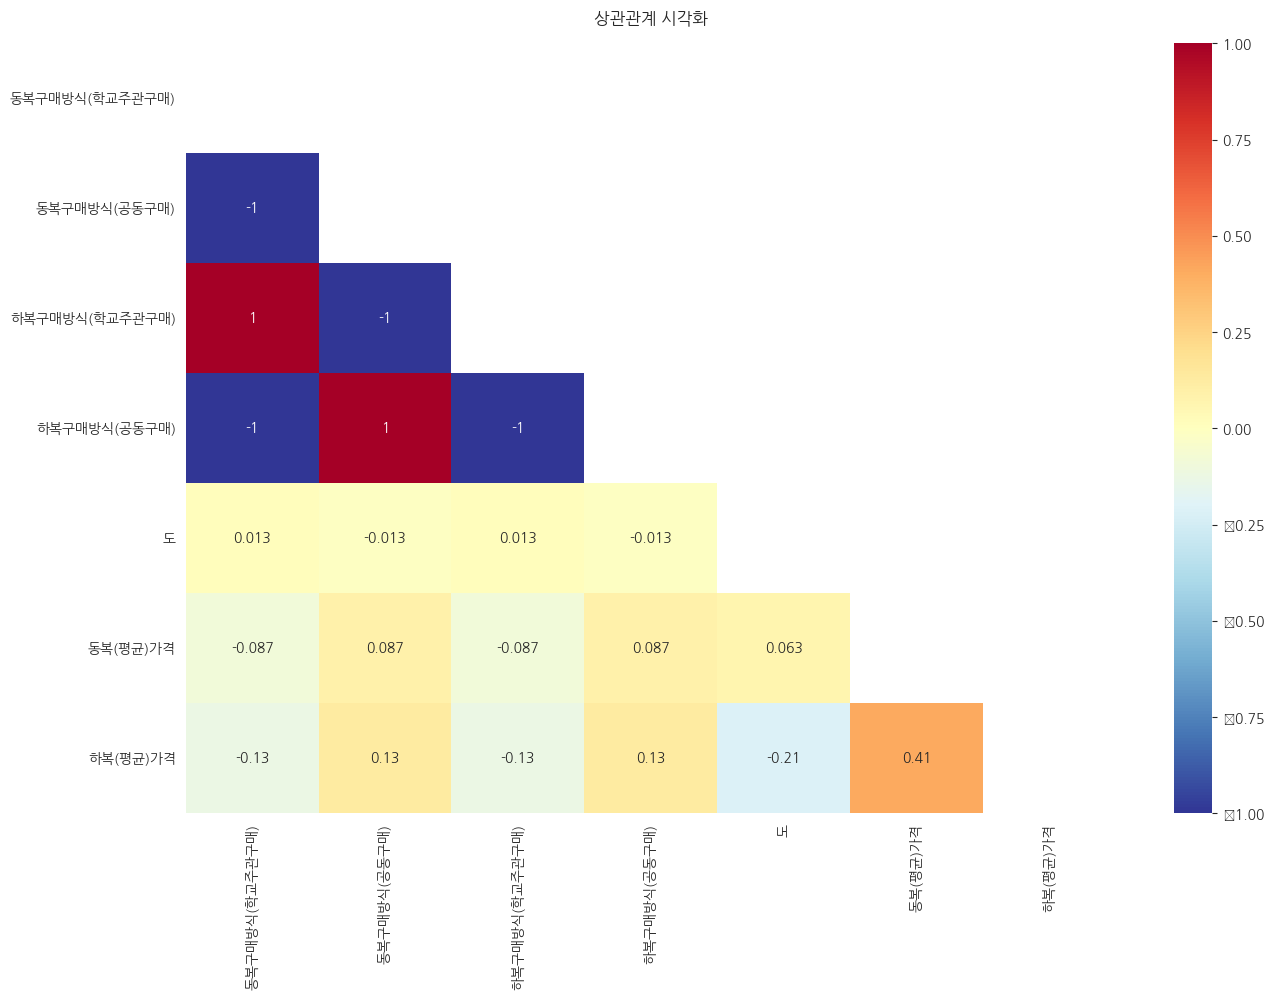

In [56]:
# 중복 제거 히트맵 시각화

import numpy as np

# 매트릭스의 우측 상단을 모두 True인 1로, 하단을 False인 0으로 변환.
np.triu(np.ones_like(df8.corr()))

# True/False mask 배열로 변환.
mask = np.triu(np.ones_like(df8.corr(), dtype=np.bool))

#  히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(15, 10))
plt.grid(False)
sns.heatmap(df8.corr(), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="RdYlBu_r", 
            cbar = True)
ax.set_title('상관관계 시각화', pad = 15)